In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加載數據
df = pd.read_csv("C:/Users/user/Desktop/Cathay/data/loan_data.csv")

# 顯示前幾行和基本信息
print(df.head())
print(df.info())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

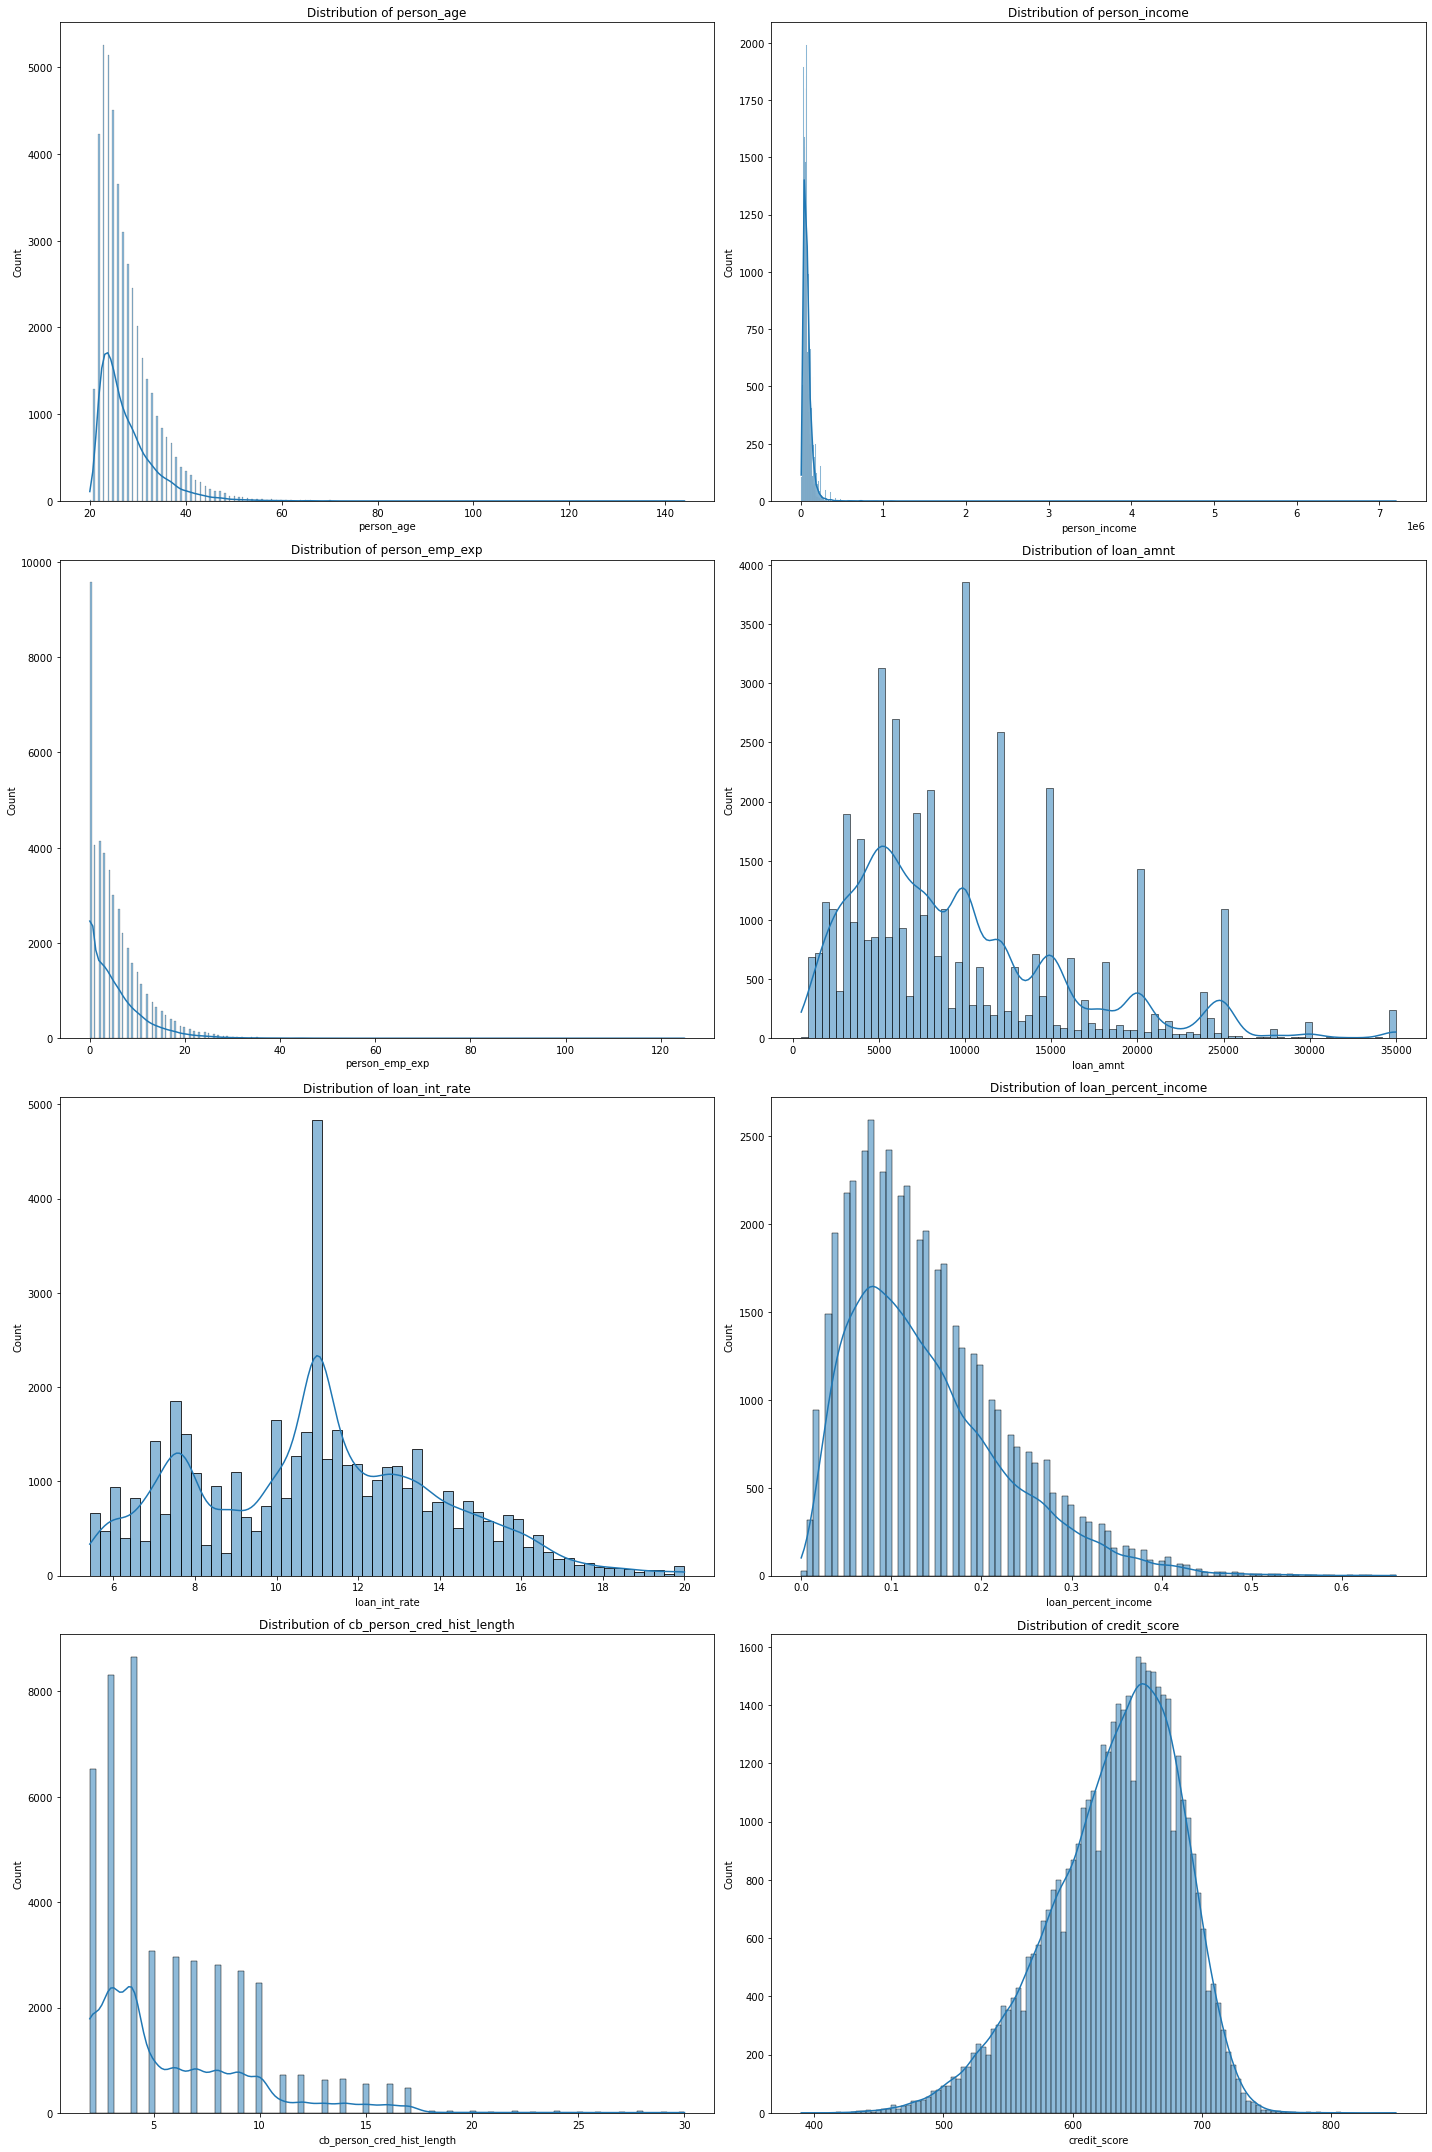

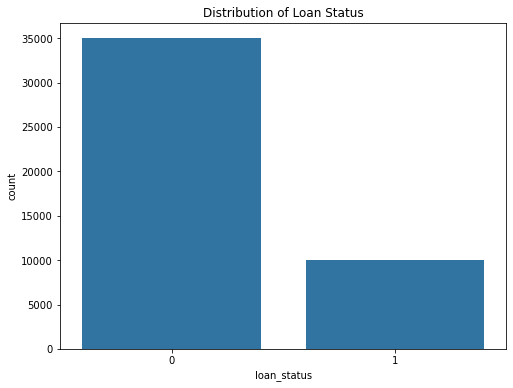

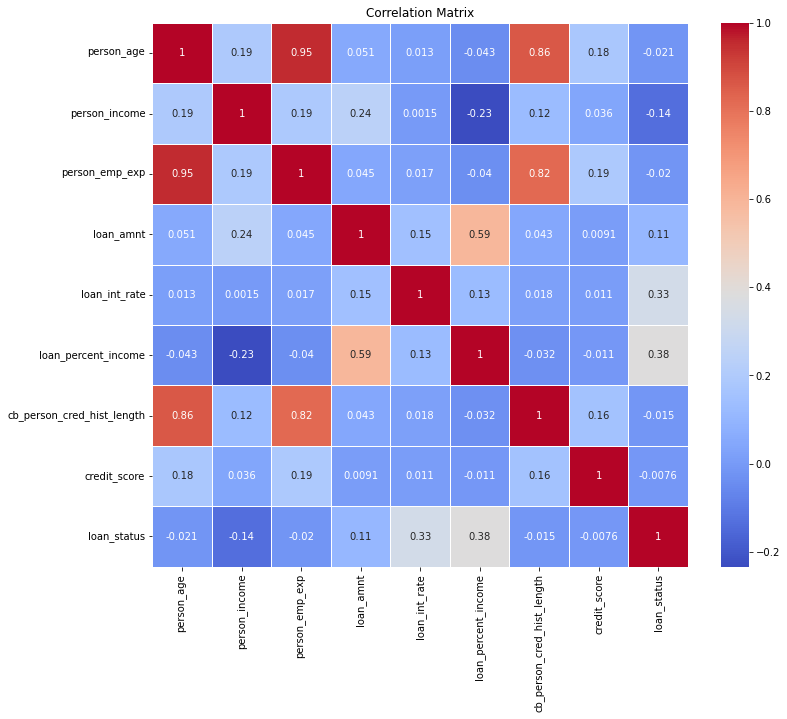

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 數值特徵的分佈
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                      'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# 目標變量的分佈
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

# 相關性矩陣
correlation_matrix = df[numerical_features + ['loan_status']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

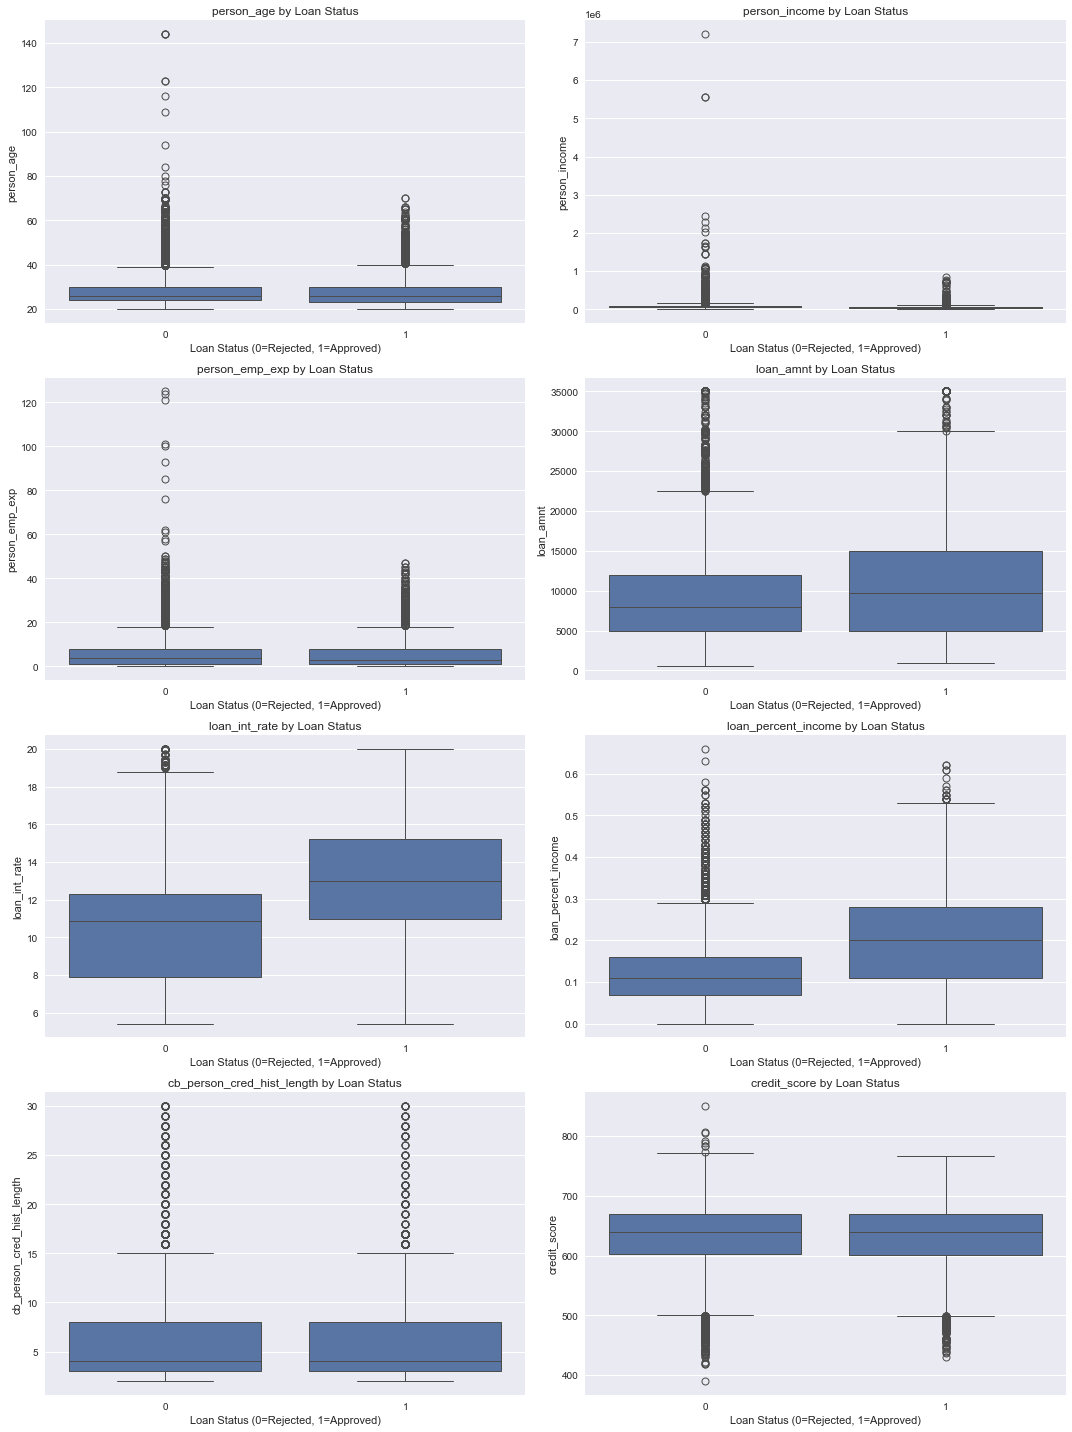


數值特徵統計摘要:
            person_age                                                      \
                 count       mean       std   min   25%   50%   75%    max   
loan_status                                                                  
0              35000.0  27.833571  6.073367  20.0  24.0  26.0  30.0  144.0   
1              10000.0  27.521300  5.939063  20.0  23.0  26.0  30.0   70.0   

            person_income                ... cb_person_cred_hist_length        \
                    count          mean  ...                        75%   max   
loan_status                              ...                                    
0                 35000.0  86157.040743  ...                        8.0  30.0   
1                 10000.0  59886.096900  ...                        8.0  30.0   

            credit_score                                                     \
                   count        mean        std    min    25%    50%    75%   
loan_status                       

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 設定圖表風格
plt.style.use('seaborn')

# 創建子圖
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 
                     'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

# 繪製每個數值特徵的箱型圖
for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Loan Status')
    axes[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')

plt.tight_layout()
plt.show()

# 計算每個特徵在不同貸款狀態下的統計摘要
summary_stats = df.groupby('loan_status')[numerical_features].describe()
print("\n數值特徵統計摘要:")
print(summary_stats)

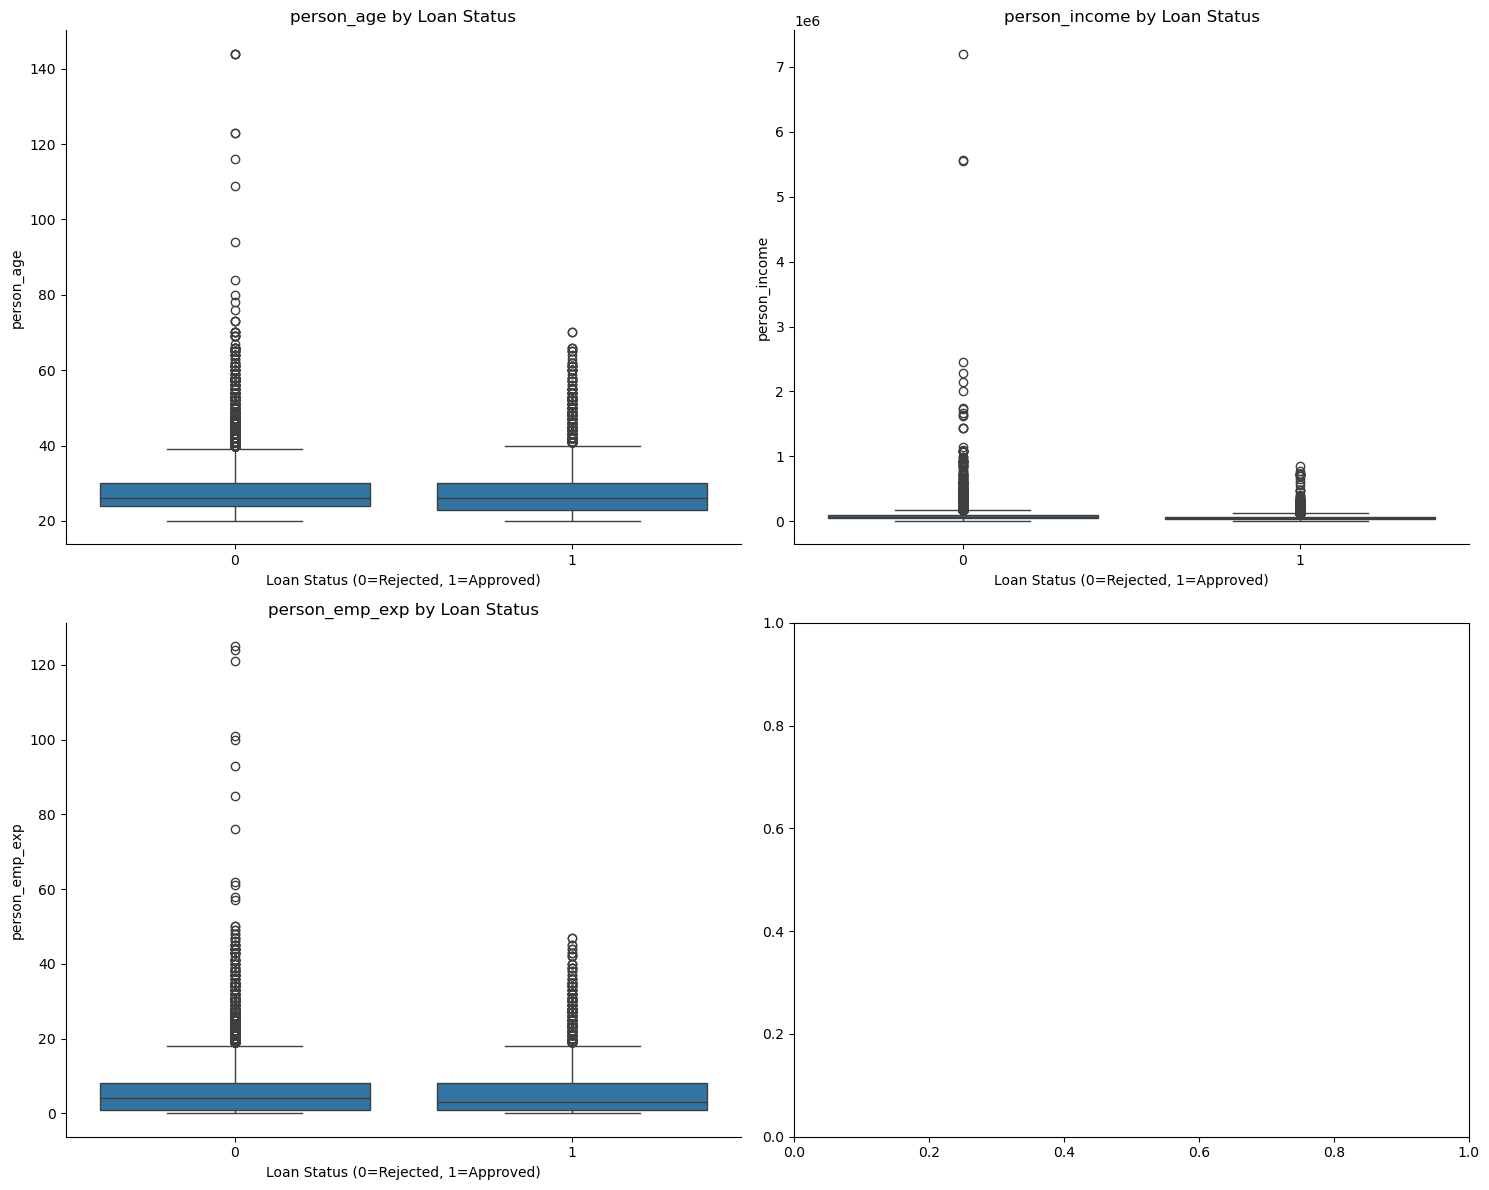

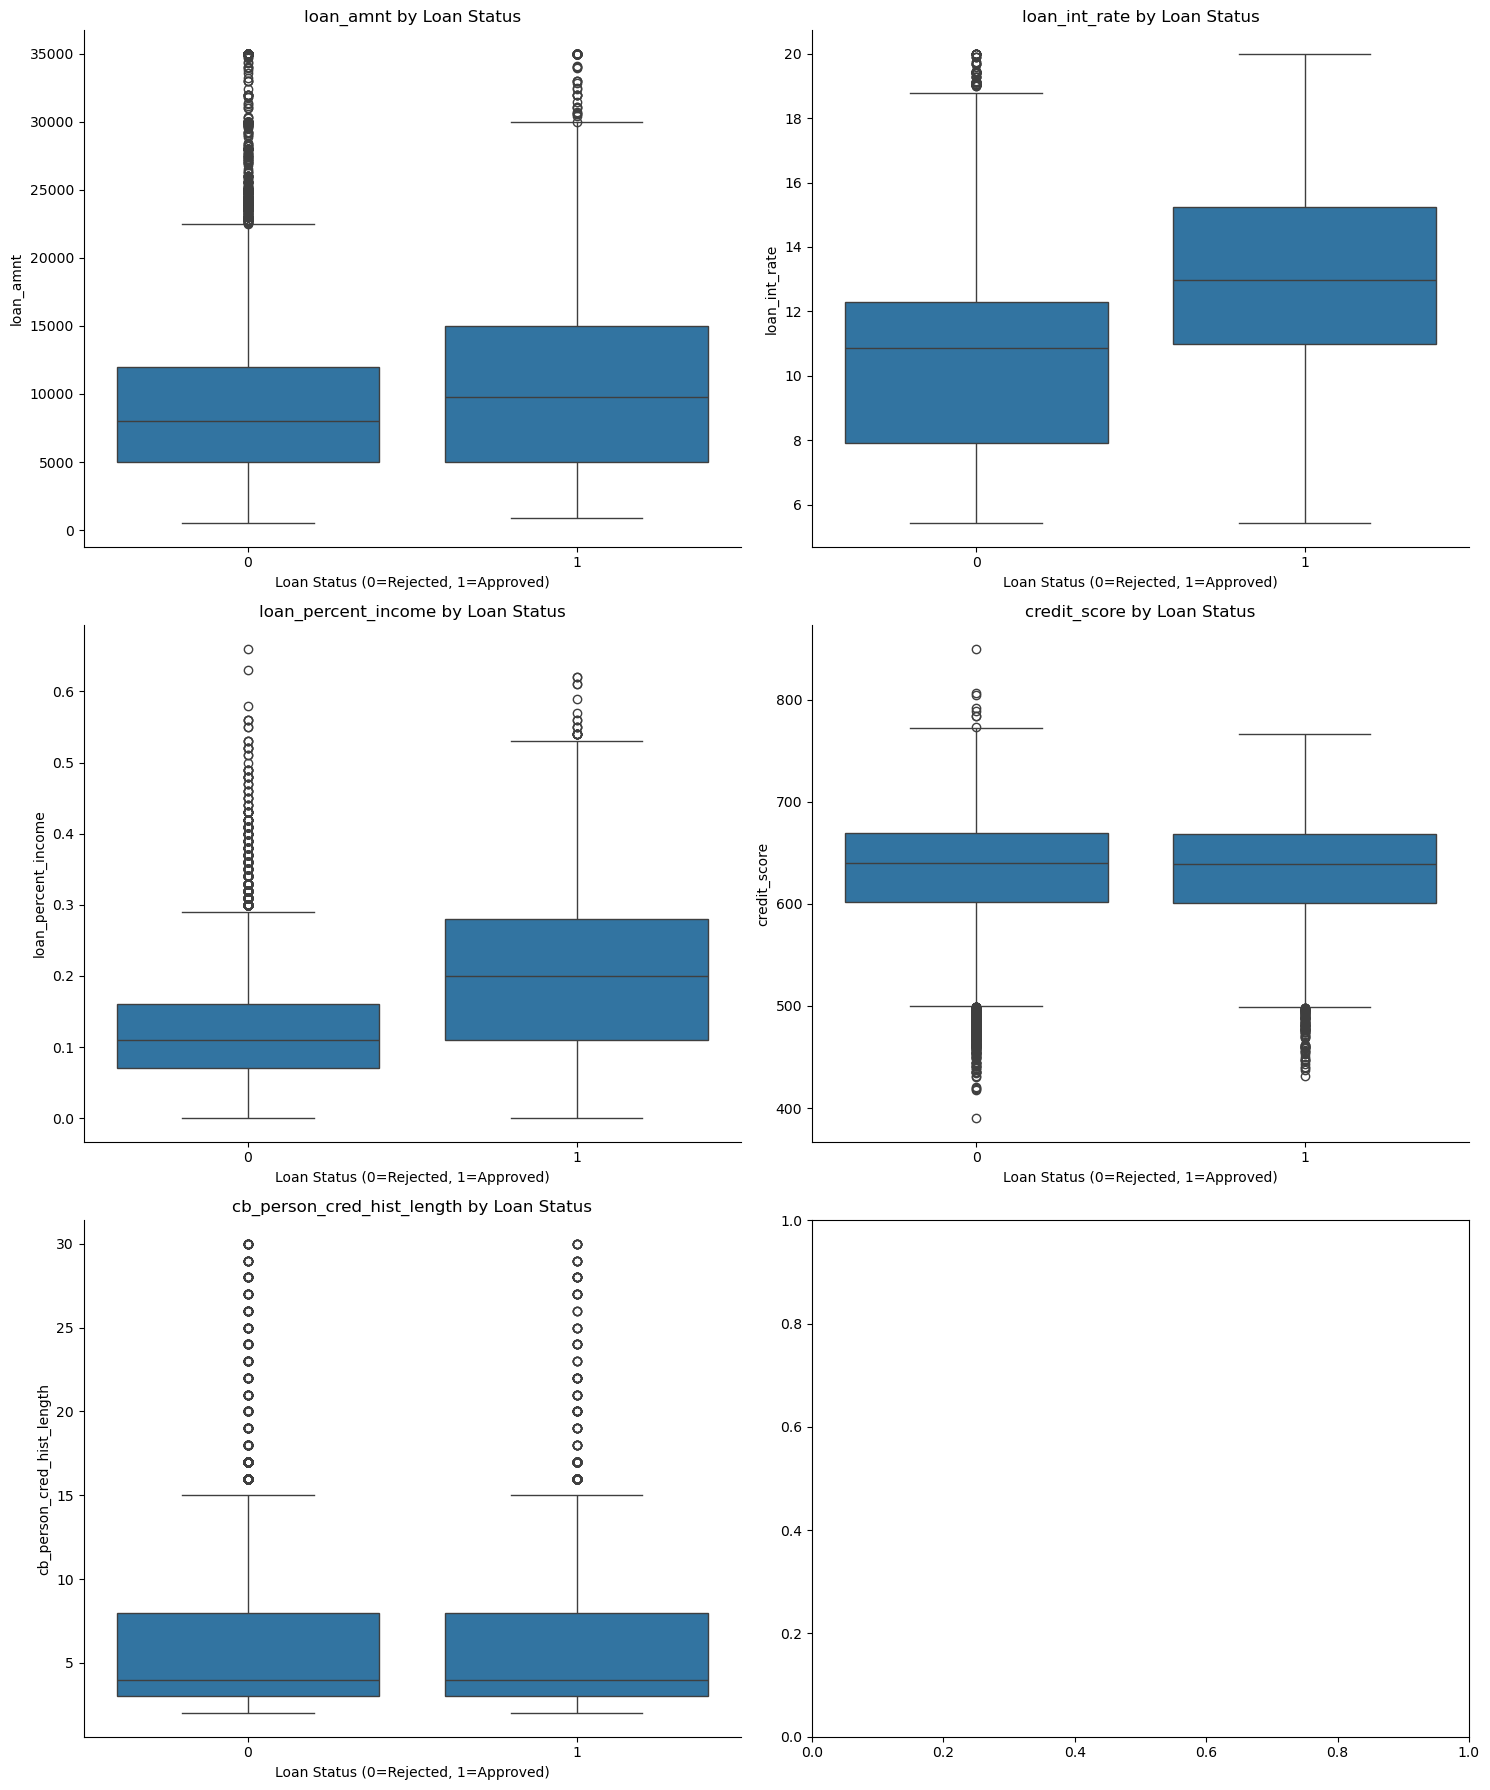

C:\Users\user\AppData\Local\Temp\ipykernel_11572\2892808366.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes3[idx].set_xticklabels(axes3[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_11572\2892808366.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes3[idx].set_xticklabels(axes3[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_11572\2892808366.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes3[idx].set_xticklabels(axes3[idx].get_xticklabels(), rotation=45)


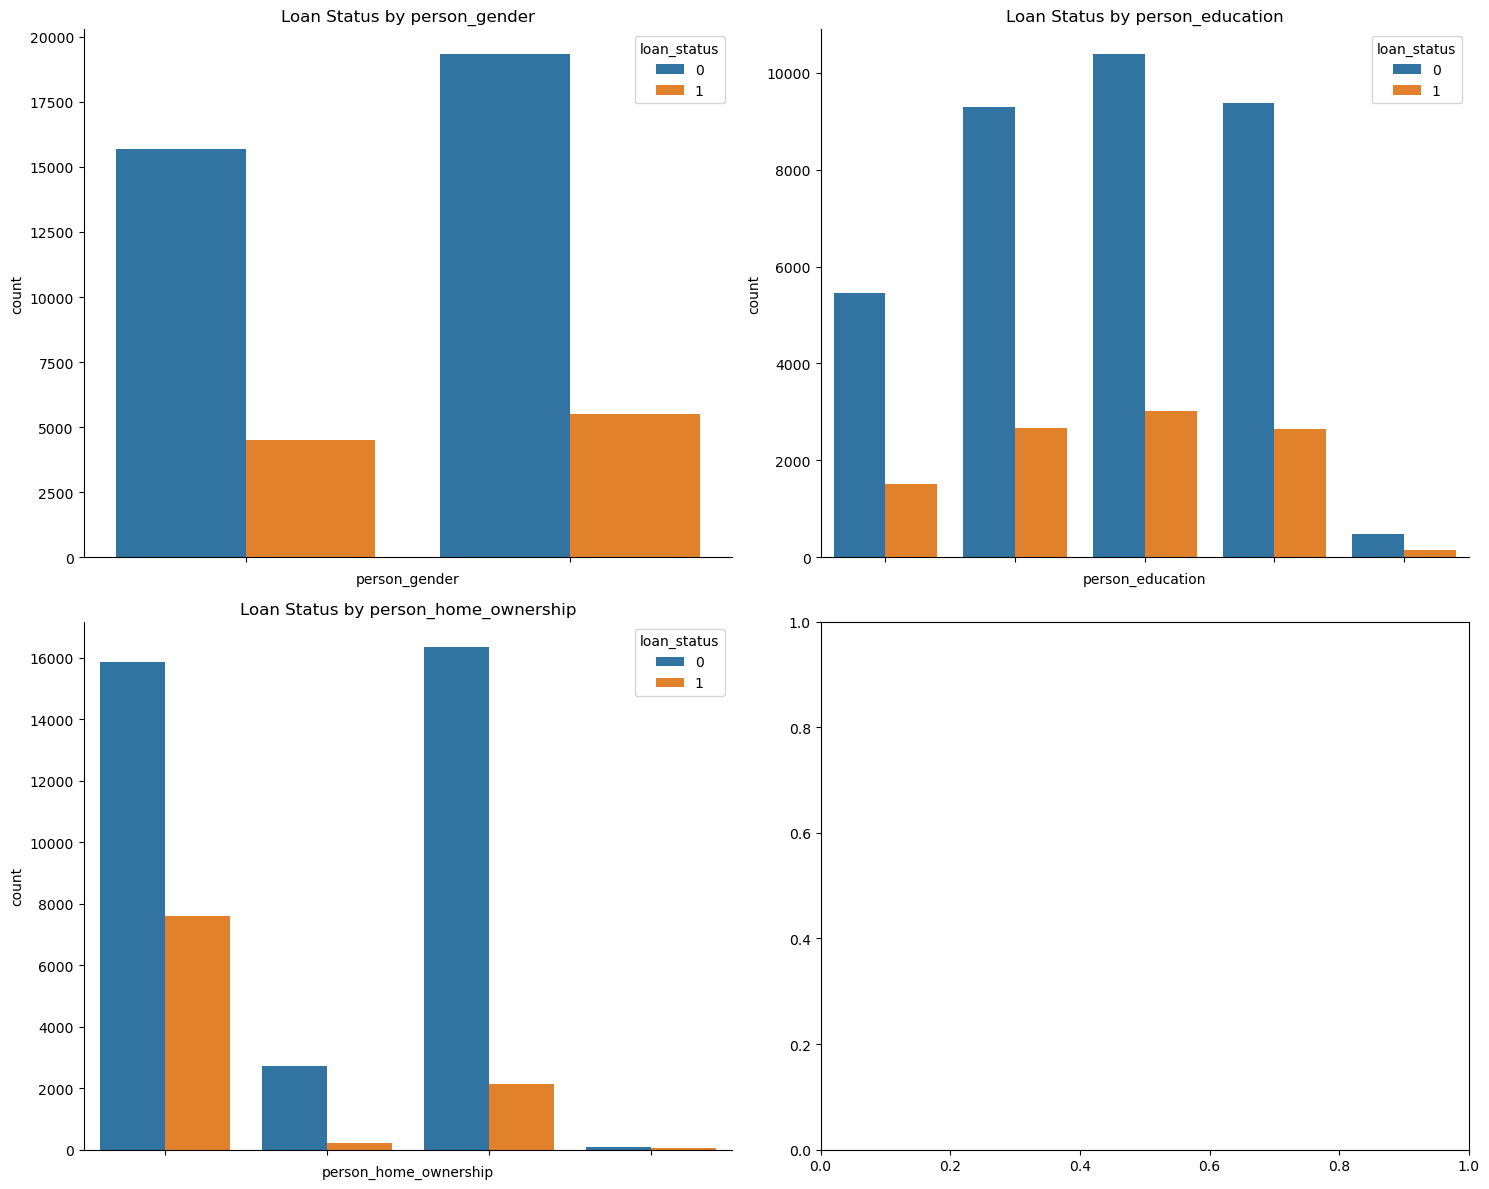

C:\Users\user\AppData\Local\Temp\ipykernel_11572\2892808366.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_11572\2892808366.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)


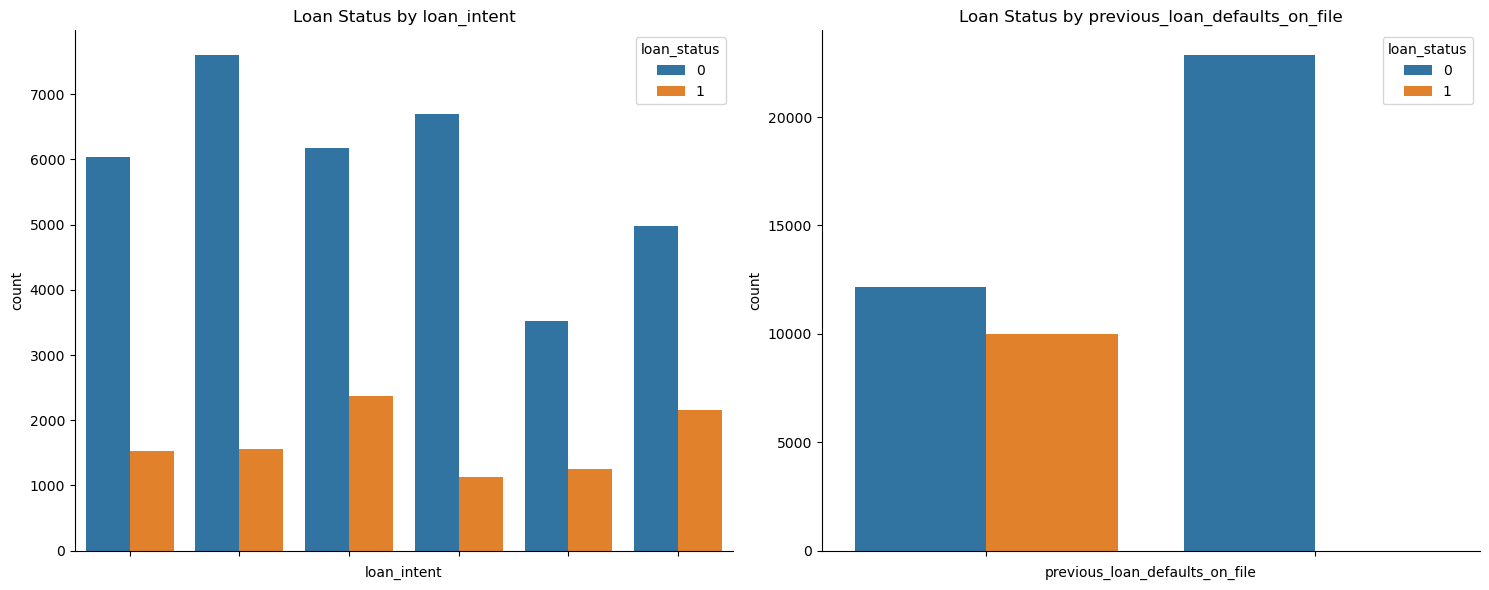

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置風格
plt.style.use('default')

# 申請人基本資訊的數值特徵
personal_numerical = ['person_age', 'person_income', 'person_emp_exp']

# 繪製申請人基本資訊的數值特徵箱型圖
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 12))
axes1 = axes1.ravel()

for idx, feature in enumerate(personal_numerical):
    sns.boxplot(data=df, x='loan_status', y=feature, ax=axes1[idx])
    axes1[idx].set_title(f'{feature} by Loan Status')
    axes1[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')
    axes1[idx].grid(False)
    axes1[idx].set_facecolor('white')
    axes1[idx].spines['top'].set_visible(False)
    axes1[idx].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 貸款相關資訊的數值特徵
loan_numerical = ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                 'credit_score', 'cb_person_cred_hist_length']

# 繪製貸款相關資訊的數值特徵箱型圖
fig2, axes2 = plt.subplots(3, 2, figsize=(15, 18))
axes2 = axes2.ravel()

for idx, feature in enumerate(loan_numerical):
    sns.boxplot(data=df, x='loan_status', y=feature, ax=axes2[idx])
    axes2[idx].set_title(f'{feature} by Loan Status')
    axes2[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')
    axes2[idx].grid(False)
    axes2[idx].set_facecolor('white')
    axes2[idx].spines['top'].set_visible(False)
    axes2[idx].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 類別特徵的分析
personal_categorical = ['person_gender', 'person_education', 'person_home_ownership']
loan_categorical = ['loan_intent', 'previous_loan_defaults_on_file']

# 繪製申請人基本資訊的類別特徵
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))
axes3 = axes3.ravel()

for idx, feature in enumerate(personal_categorical):
    sns.countplot(data=df, x=feature, hue='loan_status', ax=axes3[idx])
    axes3[idx].set_title(f'Loan Status by {feature}')
    axes3[idx].set_xticklabels(axes3[idx].get_xticklabels(), rotation=45)
    axes3[idx].grid(False)
    axes3[idx].set_facecolor('white')
    axes3[idx].spines['top'].set_visible(False)
    axes3[idx].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 繪製貸款相關資訊的類別特徵
fig4, axes4 = plt.subplots(1, 2, figsize=(15, 6))
axes4 = axes4.ravel()

for idx, feature in enumerate(loan_categorical):
    sns.countplot(data=df, x=feature, hue='loan_status', ax=axes4[idx])
    axes4[idx].set_title(f'Loan Status by {feature}')
    axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)
    axes4[idx].grid(False)
    axes4[idx].set_facecolor('white')
    axes4[idx].spines['top'].set_visible(False)
    axes4[idx].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


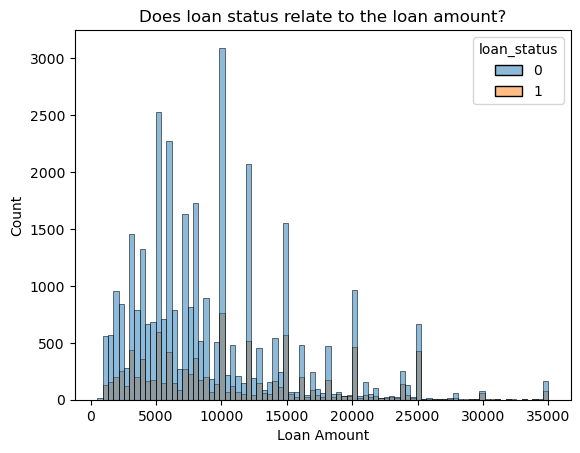

In [6]:
sns.histplot(df, x='loan_amnt', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

In [4]:
# 對類別特徵進行編碼
categorical_features = ['person_gender', 'person_education', 
                       'person_home_ownership', 'loan_intent',
                       'previous_loan_defaults_on_file']

# 創建特徵工程的數據副本
df_encoded = df.copy()

# 對類別特徵進行獨熱編碼
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)

# 顯示處理後的特徵
print("特徵工程後的特徵列表:")
print(df_encoded.columns.tolist())

特徵工程後的特徵列表:
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'person_gender_female', 'person_gender_male', 'person_education_Associate', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes']


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# 準備特徵和目標變量
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# 標準化數值特徵
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 
                     'cb_person_cred_hist_length', 'credit_score']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 使用F檢驗進行特徵選擇
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# 獲取選擇的特徵名稱
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

print("選擇的前15個最重要特徵:")
for feature, score in zip(X.columns[selected_features_mask], selector.scores_[selected_features_mask]):
    print(f"{feature}: {score:.2f}")

選擇的前15個最重要特徵:
person_income: 845.53
loan_amnt: 528.21
loan_int_rate: 5574.45
loan_percent_income: 7824.79
person_home_ownership_MORTGAGE: 2148.03
person_home_ownership_OWN: 398.28
person_home_ownership_RENT: 3135.77
loan_intent_DEBTCONSOLIDATION: 320.76
loan_intent_EDUCATION: 185.10
loan_intent_HOMEIMPROVEMENT: 51.58
loan_intent_MEDICAL: 192.08
loan_intent_PERSONAL: 22.77
loan_intent_VENTURE: 335.22
previous_loan_defaults_on_file_No: 18824.73
previous_loan_defaults_on_file_Yes: 18824.73


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 使用選定的特徵
X = df_encoded[selected_features]
y = df_encoded['loan_status']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# 輸出模型評估報告
print(classification_report(y_test, y_pred))

# 輸出混淆矩陣
print("\n混淆矩陣:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000


混淆矩陣:
[[6761  229]
 [ 400 1610]]


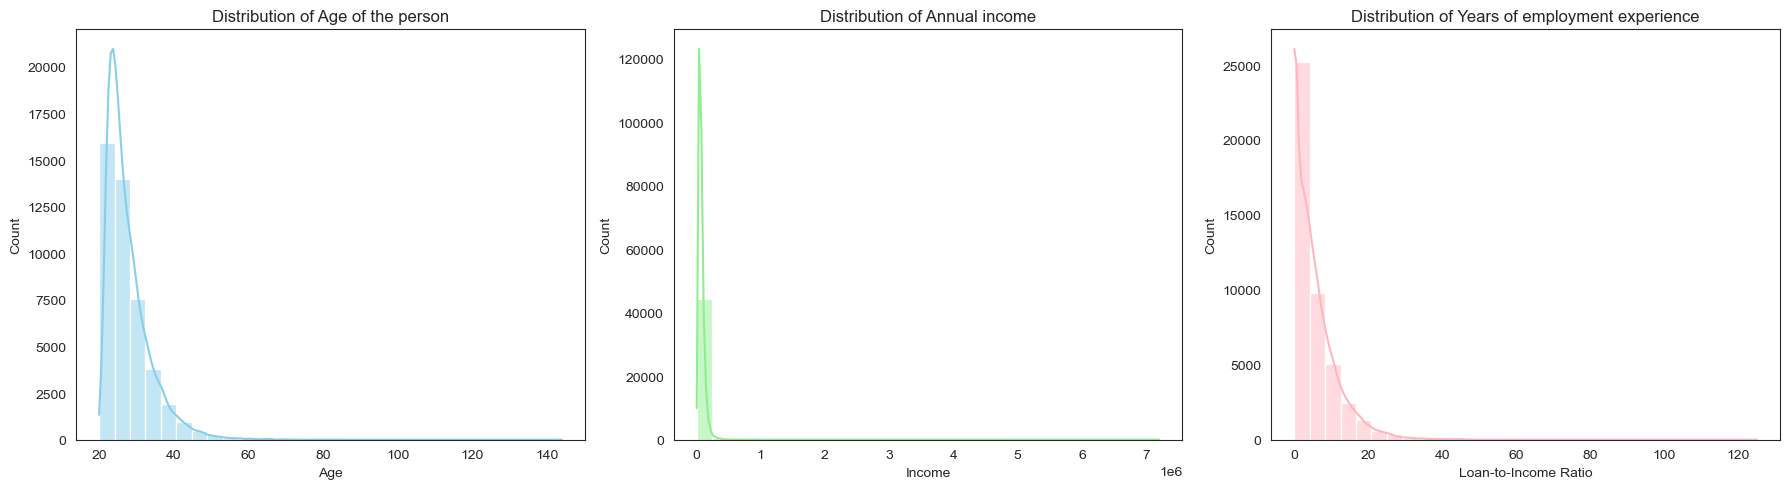

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假設df是您的數據框架
# 設置風格
plt.style.use('default')
sns.set_style("white")

# 創建子圖
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 繪製年齡分布
sns.histplot(data=df, x='person_age', bins=30, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Age of the person')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.grid(False)

# 繪製收入分布
sns.histplot(data=df, x='person_income', bins=30, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Annual income')
ax2.set_xlabel('Income')
ax2.set_ylabel('Count')
ax2.grid(False)

sns.histplot(data=df, x='person_emp_exp', bins=30, kde=True, ax=ax3, color='lightpink')
ax3.set_title('Distribution of Years of employment experience')
ax3.set_xlabel('Loan-to-Income Ratio')
ax3.set_ylabel('Count')
ax3.grid(False)


# 調整布局
plt.tight_layout()
plt.show()


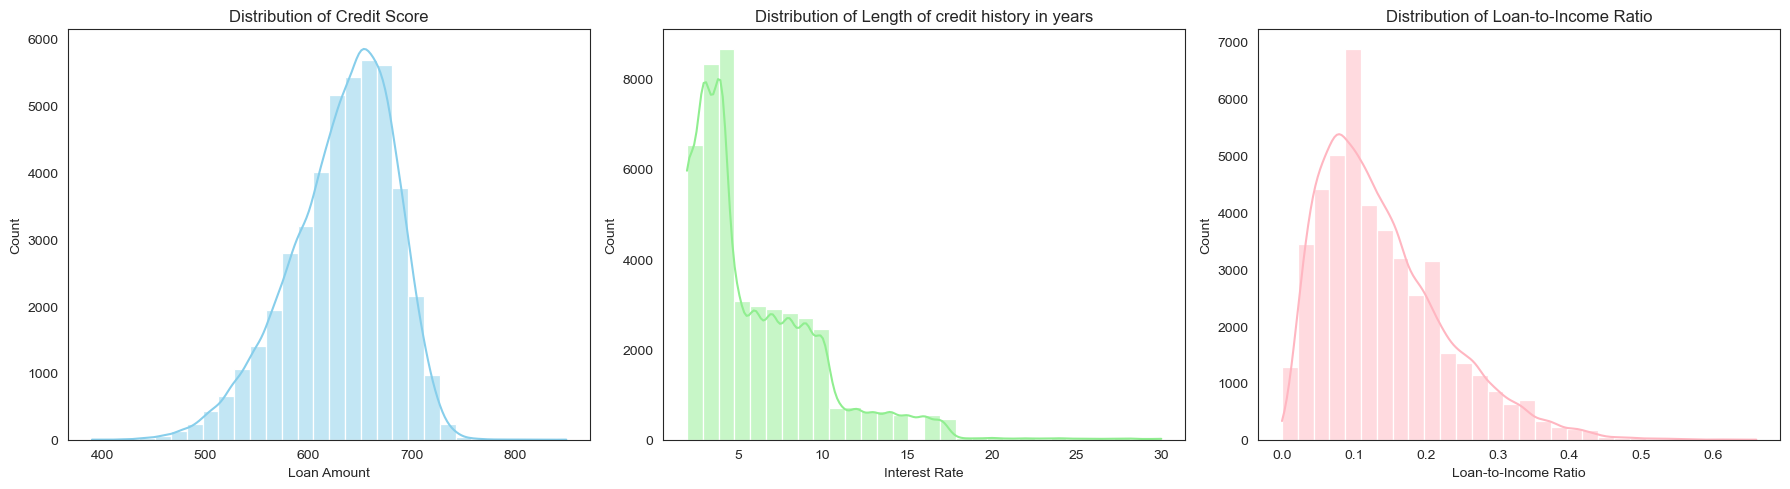

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 創建子圖
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 貸款金額分布
sns.histplot(data=df, x='credit_score', bins=30, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Credit Score')
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel('Count')
ax1.grid(False)

# 利率分布
sns.histplot(data=df, x='cb_person_cred_hist_length', bins=30, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Length of credit history in years')
ax2.set_xlabel('Interest Rate')
ax2.set_ylabel('Count')
ax2.grid(False)

# 貸款收入比分布
sns.histplot(data=df, x='loan_percent_income', bins=30, kde=True, ax=ax3, color='lightpink')
ax3.set_title('Distribution of Loan-to-Income Ratio')
ax3.set_xlabel('Loan-to-Income Ratio')
ax3.set_ylabel('Count')
ax3.grid(False)

# 調整布局
plt.tight_layout()
plt.show()


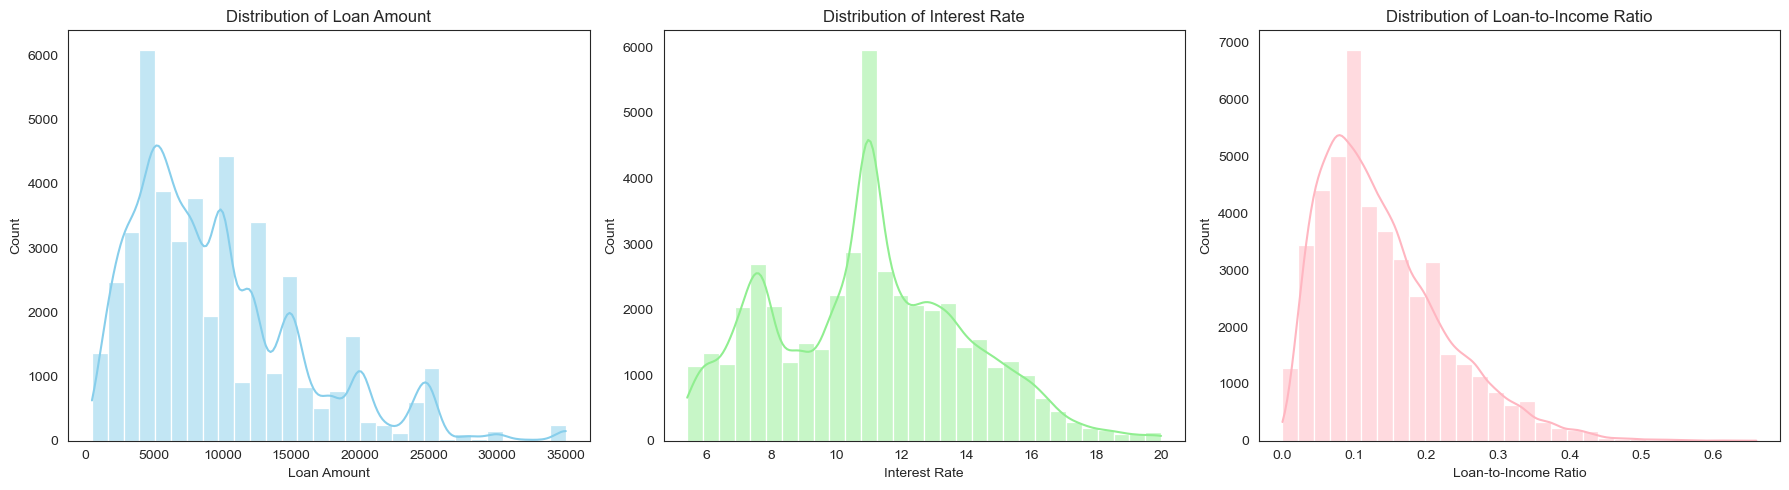

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 創建子圖
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 貸款金額分布
sns.histplot(data=df, x='loan_amnt', bins=30, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Loan Amount')
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel('Count')
ax1.grid(False)

# 利率分布
sns.histplot(data=df, x='loan_int_rate', bins=30, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Interest Rate')
ax2.set_xlabel('Interest Rate')
ax2.set_ylabel('Count')
ax2.grid(False)

# 貸款收入比分布
sns.histplot(data=df, x='loan_percent_income', bins=30, kde=True, ax=ax3, color='lightpink')
ax3.set_title('Distribution of Loan-to-Income Ratio')
ax3.set_xlabel('Loan-to-Income Ratio')
ax3.set_ylabel('Count')
ax3.grid(False)

# 調整布局
plt.tight_layout()
plt.show()


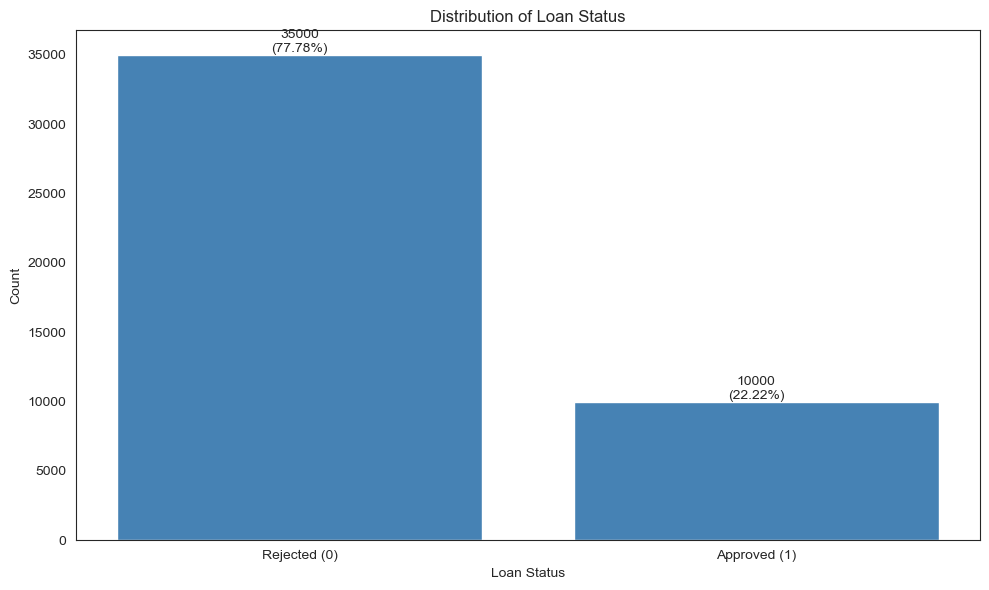

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算各類別的百分比
loan_status_counts = df['loan_status'].value_counts()
loan_status_percent = (loan_status_counts / len(df) * 100).round(2)

# 創建圖形
plt.figure(figsize=(10, 6))

# 繪製柱狀圖
bars = plt.bar(['Rejected (0)', 'Approved (1)'], loan_status_counts, color='steelblue')

# 在柱子上添加數值標籤和百分比
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({loan_status_percent[bars.index(bar)]}%)',
             ha='center', va='bottom')

# 設置標題和標籤
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# 移除網格線
plt.grid(False)

# 調整布局
plt.tight_layout()

plt.show()



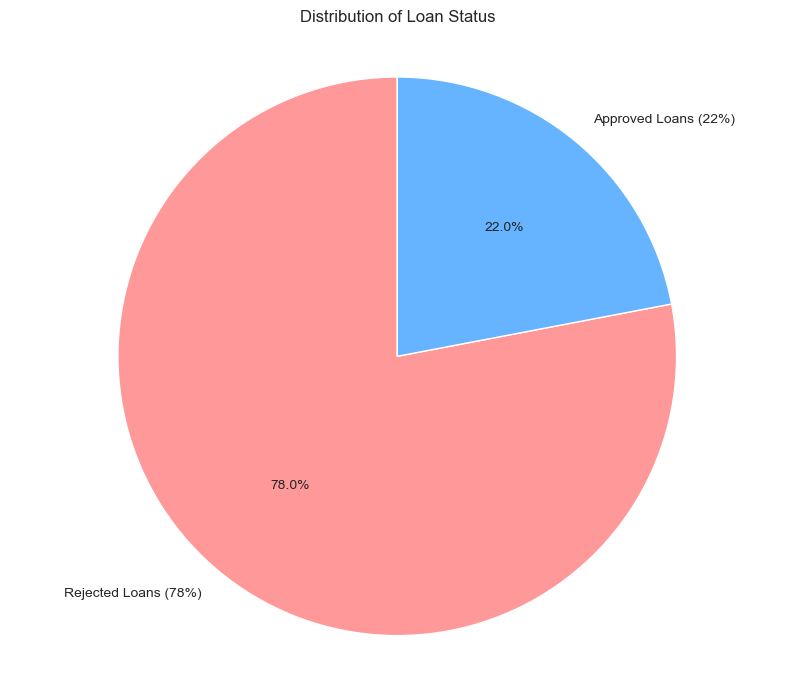

In [10]:
import matplotlib.pyplot as plt

# 計算各類別的比例
loan_status_counts = df['loan_status'].value_counts()
labels = ['Rejected Loans (78%)', 'Approved Loans (22%)']
sizes = [78, 22]
colors = ['#ff9999', '#66b3ff']

# 繪製圓餅圖
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)

# 確保圓形比例正確
plt.axis('equal')

# 移除背景色
plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')

# 添加標題
plt.title('Distribution of Loan Status', pad=20)

plt.show()


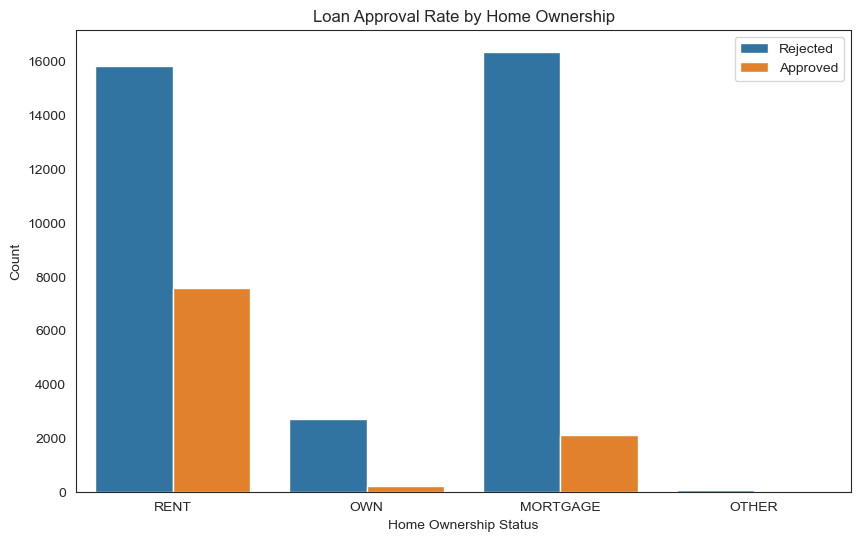

各類住房的貸款批准率：
person_home_ownership
OTHER       0.333333
RENT        0.323977
MORTGAGE    0.115961
OWN         0.075229
Name: loan_status, dtype: float64


In [11]:
# 住房所有權與貸款批准的關係
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='person_home_ownership', hue='loan_status')
plt.title('Loan Approval Rate by Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'])
plt.show()

# 計算各類住房的批准率
approval_rate = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False)
print("各類住房的貸款批准率：")
print(approval_rate)


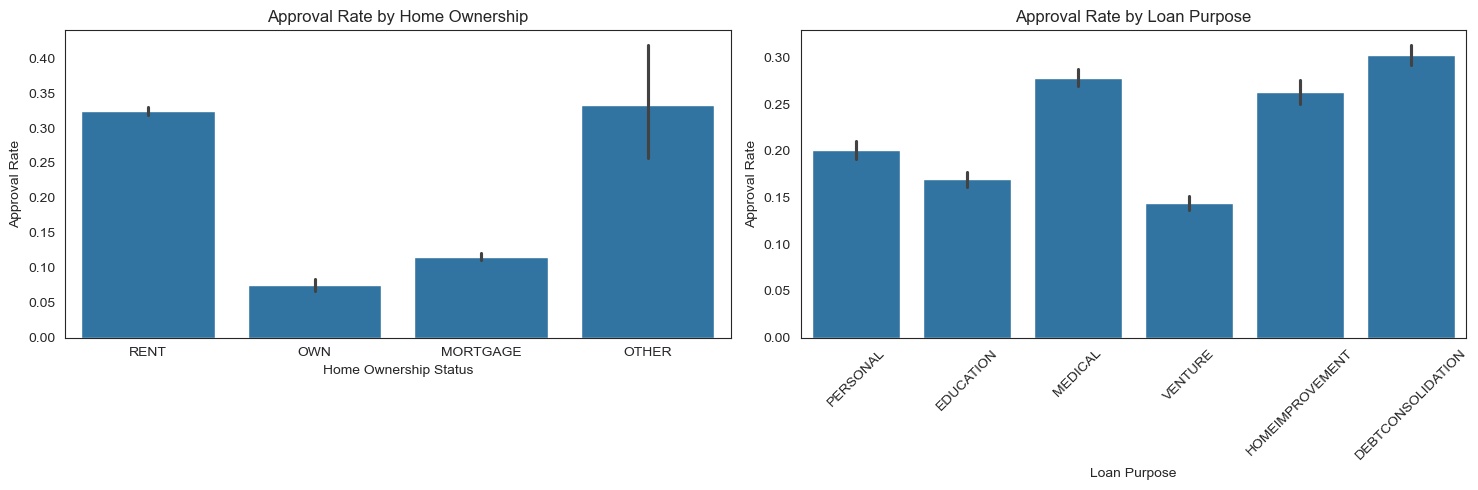

In [12]:
# 分析住房所有權和貸款目的對貸款批准的影響
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 住房所有權分析
sns.barplot(data=df, x='person_home_ownership', y='loan_status', ax=ax1)
ax1.set_title('Approval Rate by Home Ownership')
ax1.set_xlabel('Home Ownership Status')
ax1.set_ylabel('Approval Rate')

# 貸款目的分析
sns.barplot(data=df, x='loan_intent', y='loan_status', ax=ax2)
ax2.set_title('Approval Rate by Loan Purpose')
ax2.set_xlabel('Loan Purpose')
ax2.set_ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


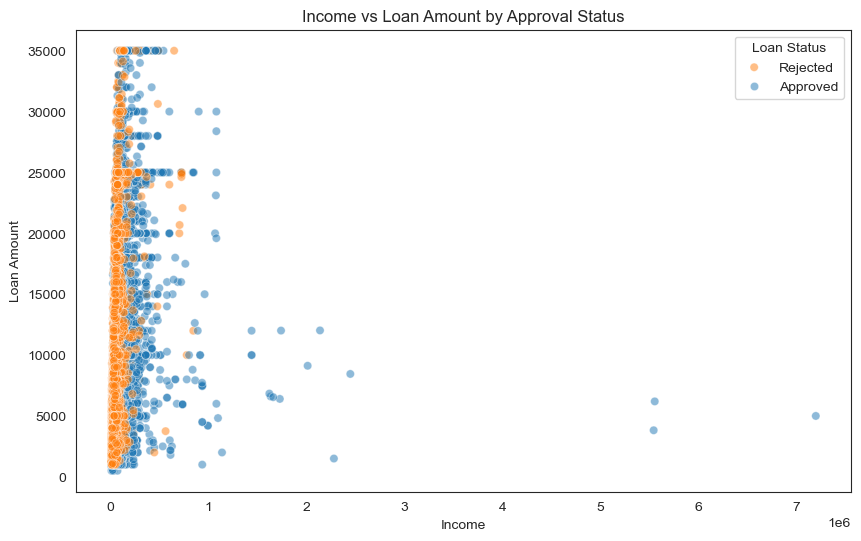

In [13]:
# 分析收入與貸款金額的關係
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.5)
plt.title('Income vs Loan Amount by Approval Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()


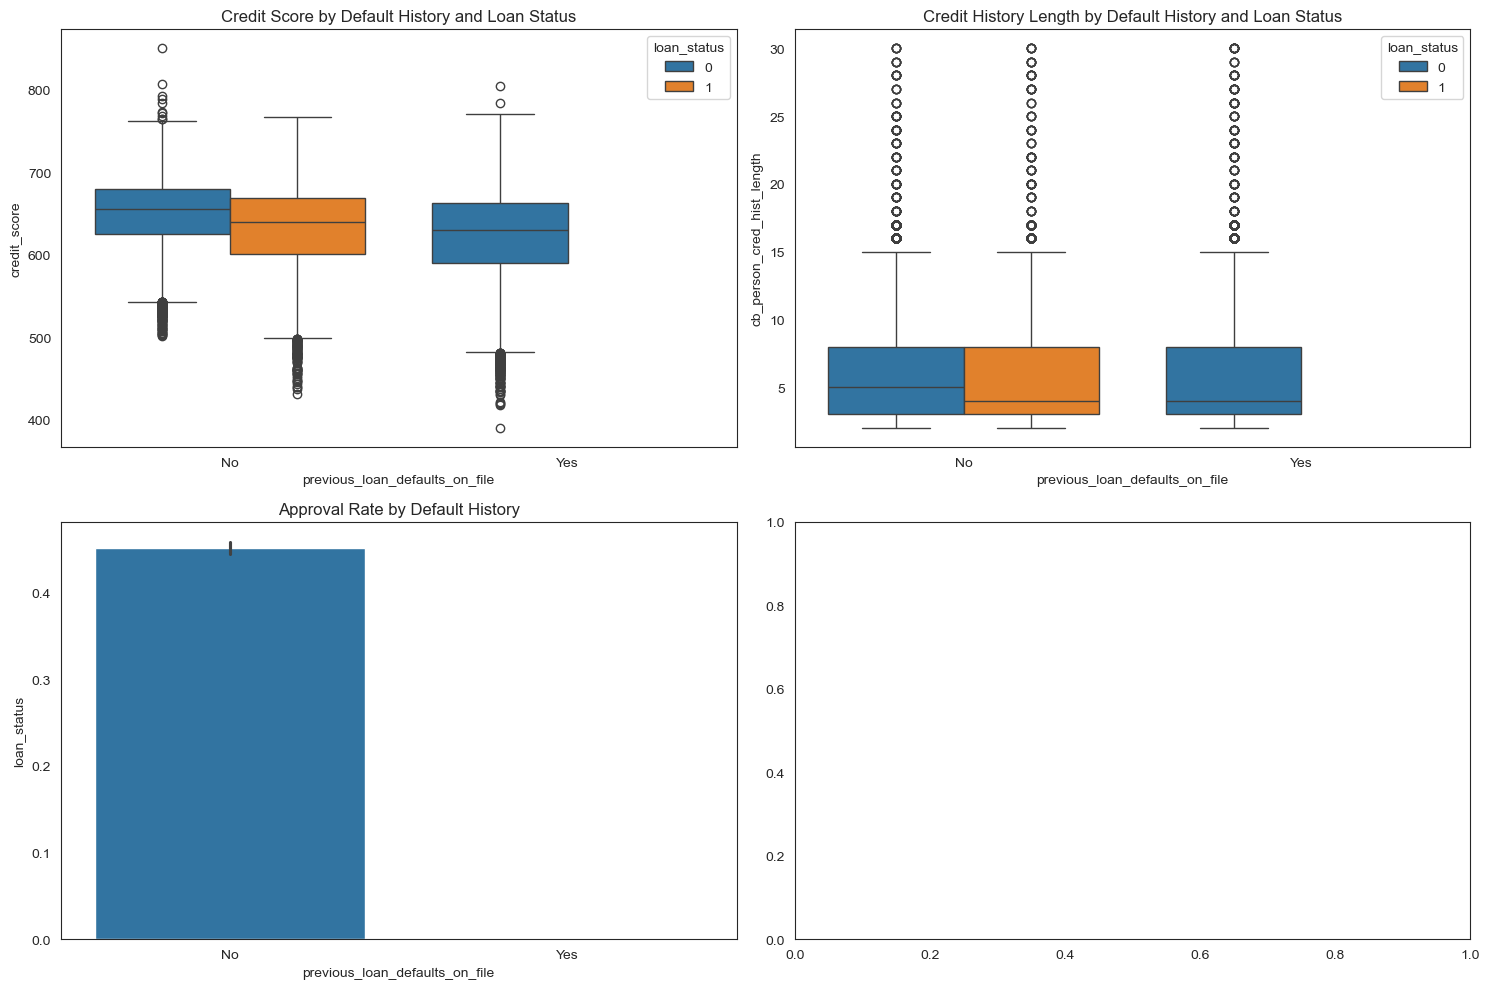

In [14]:
# 分析信用分數、信用歷史長度和違約記錄的綜合影響
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 信用分數分布
sns.boxplot(data=df, x='previous_loan_defaults_on_file', y='credit_score', 
            hue='loan_status', ax=axes[0,0])
axes[0,0].set_title('Credit Score by Default History and Loan Status')

# 信用歷史長度
sns.boxplot(data=df, x='previous_loan_defaults_on_file', 
            y='cb_person_cred_hist_length', hue='loan_status', ax=axes[0,1])
axes[0,1].set_title('Credit History Length by Default History and Loan Status')

# 違約記錄的影響
sns.barplot(data=df, x='previous_loan_defaults_on_file', y='loan_status', ax=axes[1,0])
axes[1,0].set_title('Approval Rate by Default History')

plt.tight_layout()
plt.show()


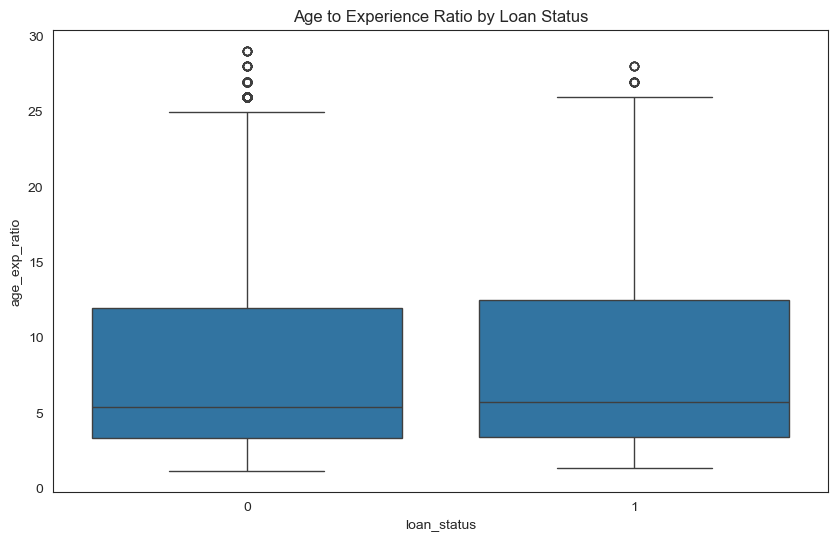

In [15]:
# 分析年齡和工作經驗對貸款批准的共同影響
plt.figure(figsize=(10, 6))
df['age_exp_ratio'] = df['person_age'] / (df['person_emp_exp'] + 1)
sns.boxplot(data=df, x='loan_status', y='age_exp_ratio')
plt.title('Age to Experience Ratio by Loan Status')
plt.show()


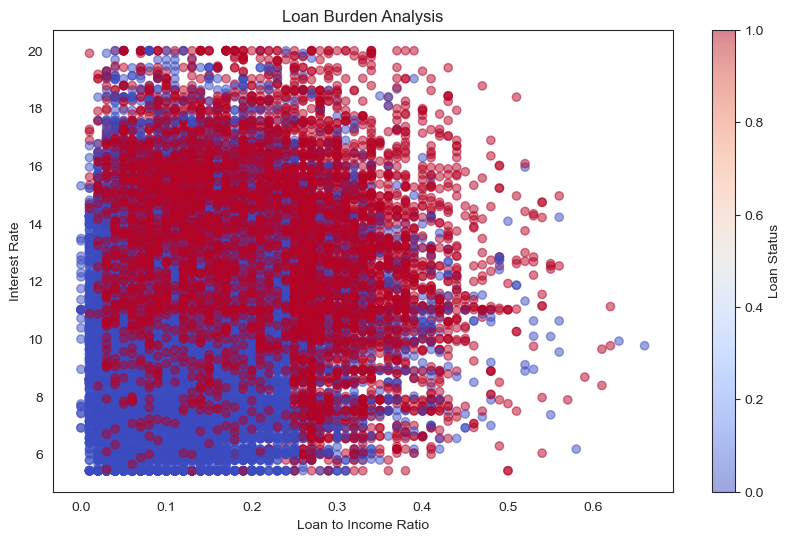

In [16]:
# 分析貸款收入比和利率的組合效應
plt.figure(figsize=(10, 6))
plt.scatter(df['loan_percent_income'], df['loan_int_rate'], 
            c=df['loan_status'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Loan Status')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Interest Rate')
plt.title('Loan Burden Analysis')
plt.show()


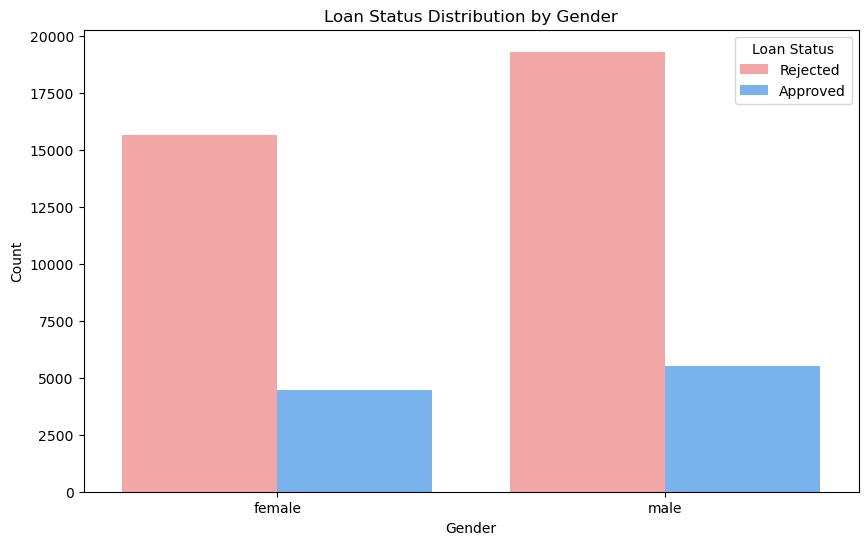

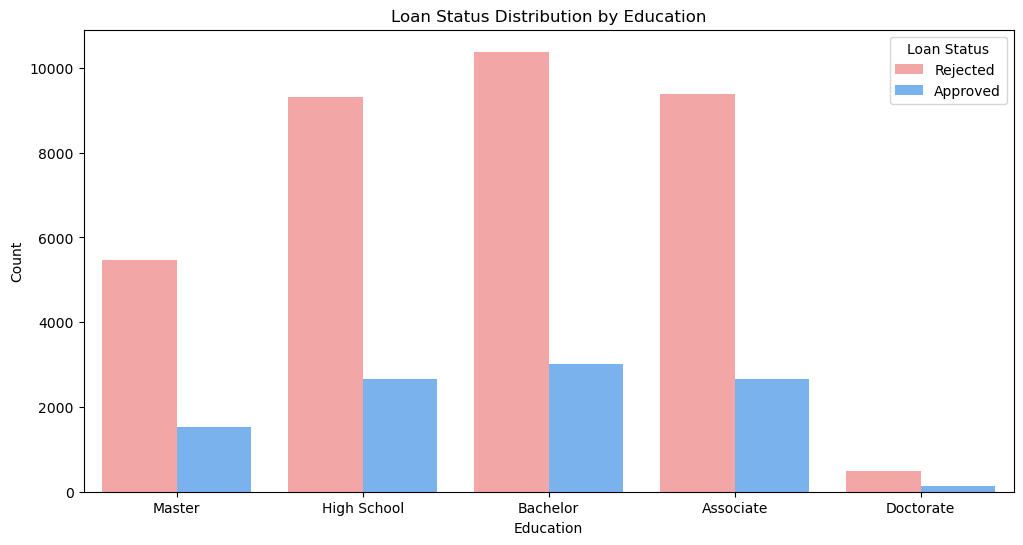

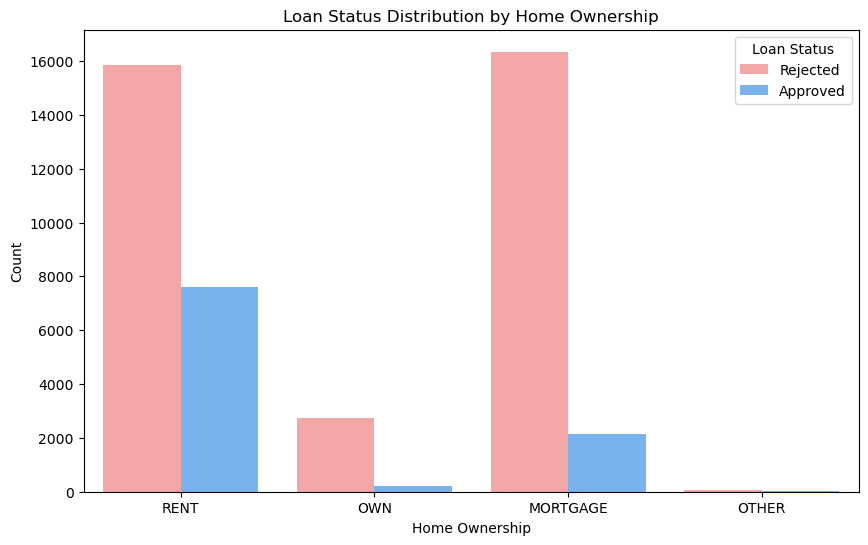

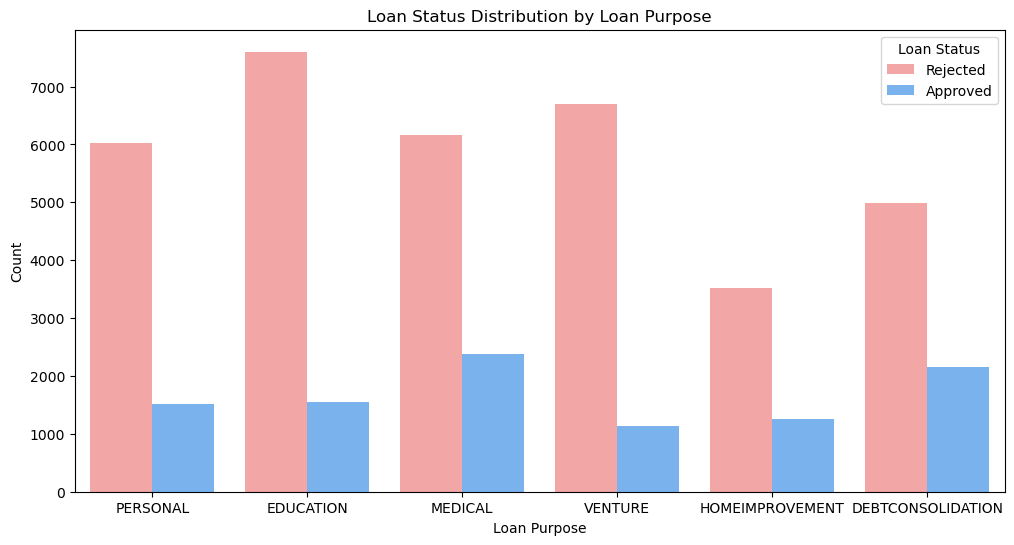

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置風格
plt.style.use('default')
colors = ['#FF9999', '#66B2FF']

# 1. 性別分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='person_gender', hue='loan_status', palette=colors)
plt.title('Loan Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='upper right')
plt.grid(False)
plt.show()

# 2. 教育程度分布
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='person_education', hue='loan_status', palette=colors)
plt.title('Loan Status Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='upper right')
plt.grid(False)
plt.show()

# 3. 住房所有權分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', palette=colors)
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='upper right')
plt.grid(False)
plt.show()

# 4. 貸款目的分布
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_intent', hue='loan_status', palette=colors)
plt.title('Loan Status Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'], loc='upper right')
plt.grid(False)
plt.show()


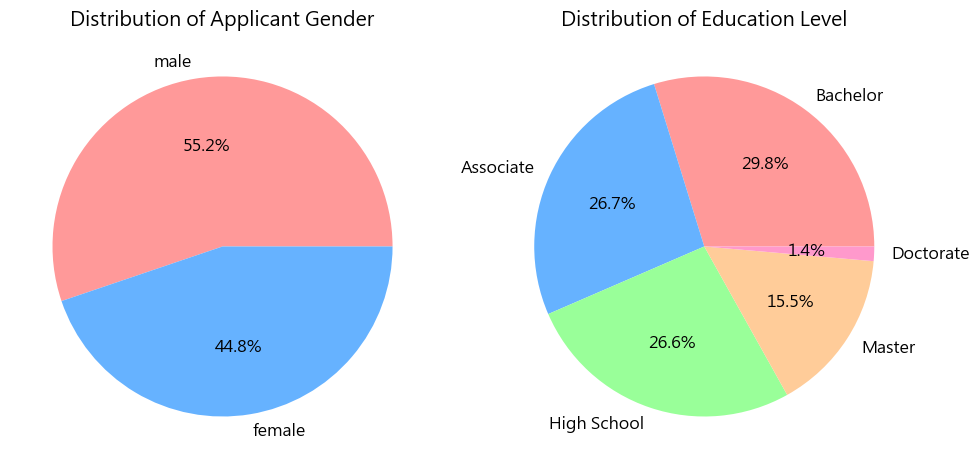

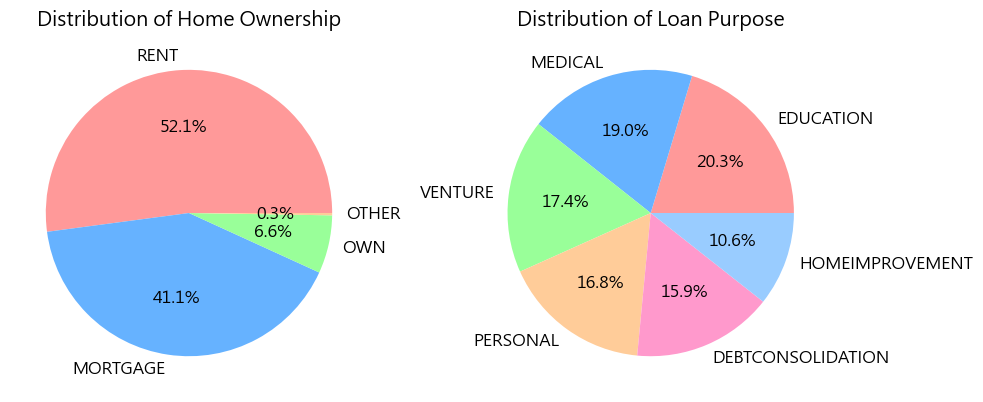

In [29]:
import matplotlib.pyplot as plt

# 設置中文字體（如果需要）
plt.rcParams['font.size'] = 12

# 申請人基本特徵
# 性別分布
plt.figure(figsize=(10, 5))
plt.subplot(121)
gender_data = df['person_gender'].value_counts()
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Applicant Gender')

# 教育程度分布
plt.subplot(122)
education_data = df['person_education'].value_counts()
plt.pie(education_data, labels=education_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title('Distribution of Education Level')
plt.tight_layout()
plt.show()

# 貸款相關特徵
# 住房所有權狀態
plt.figure(figsize=(10, 5))
plt.subplot(121)
home_data = df['person_home_ownership'].value_counts()
plt.pie(home_data, labels=home_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Distribution of Home Ownership')

# 貸款目的
plt.subplot(122)
purpose_data = df['loan_intent'].value_counts()
plt.pie(purpose_data, labels=purpose_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF'])
plt.title('Distribution of Loan Purpose')
plt.tight_layout()
plt.show()


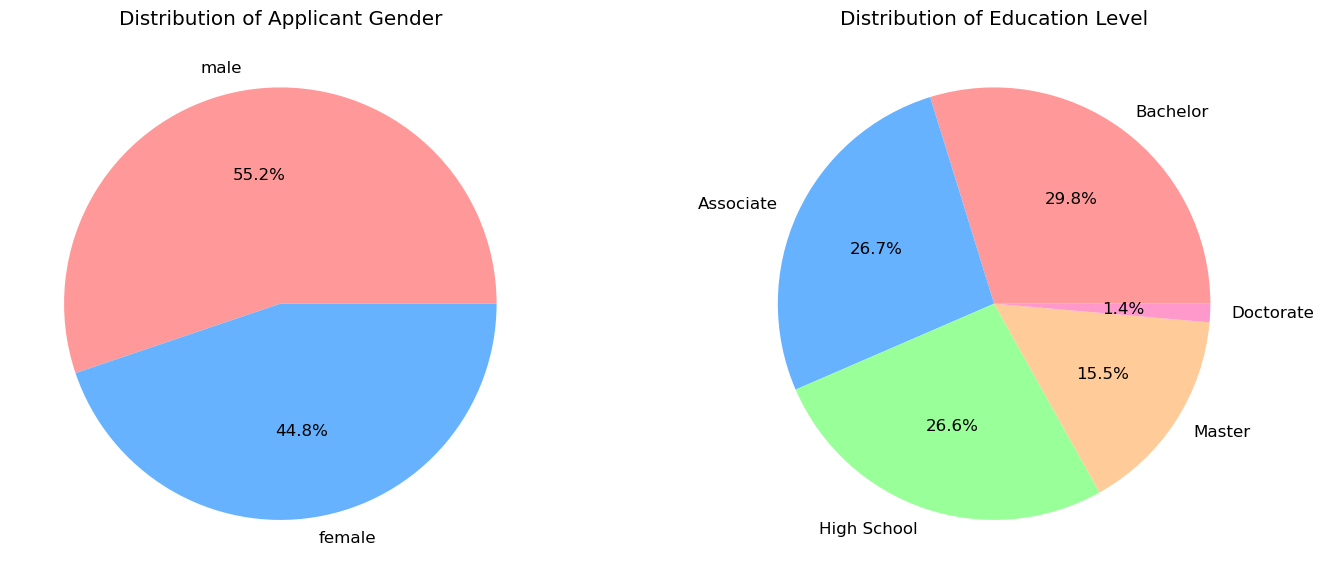

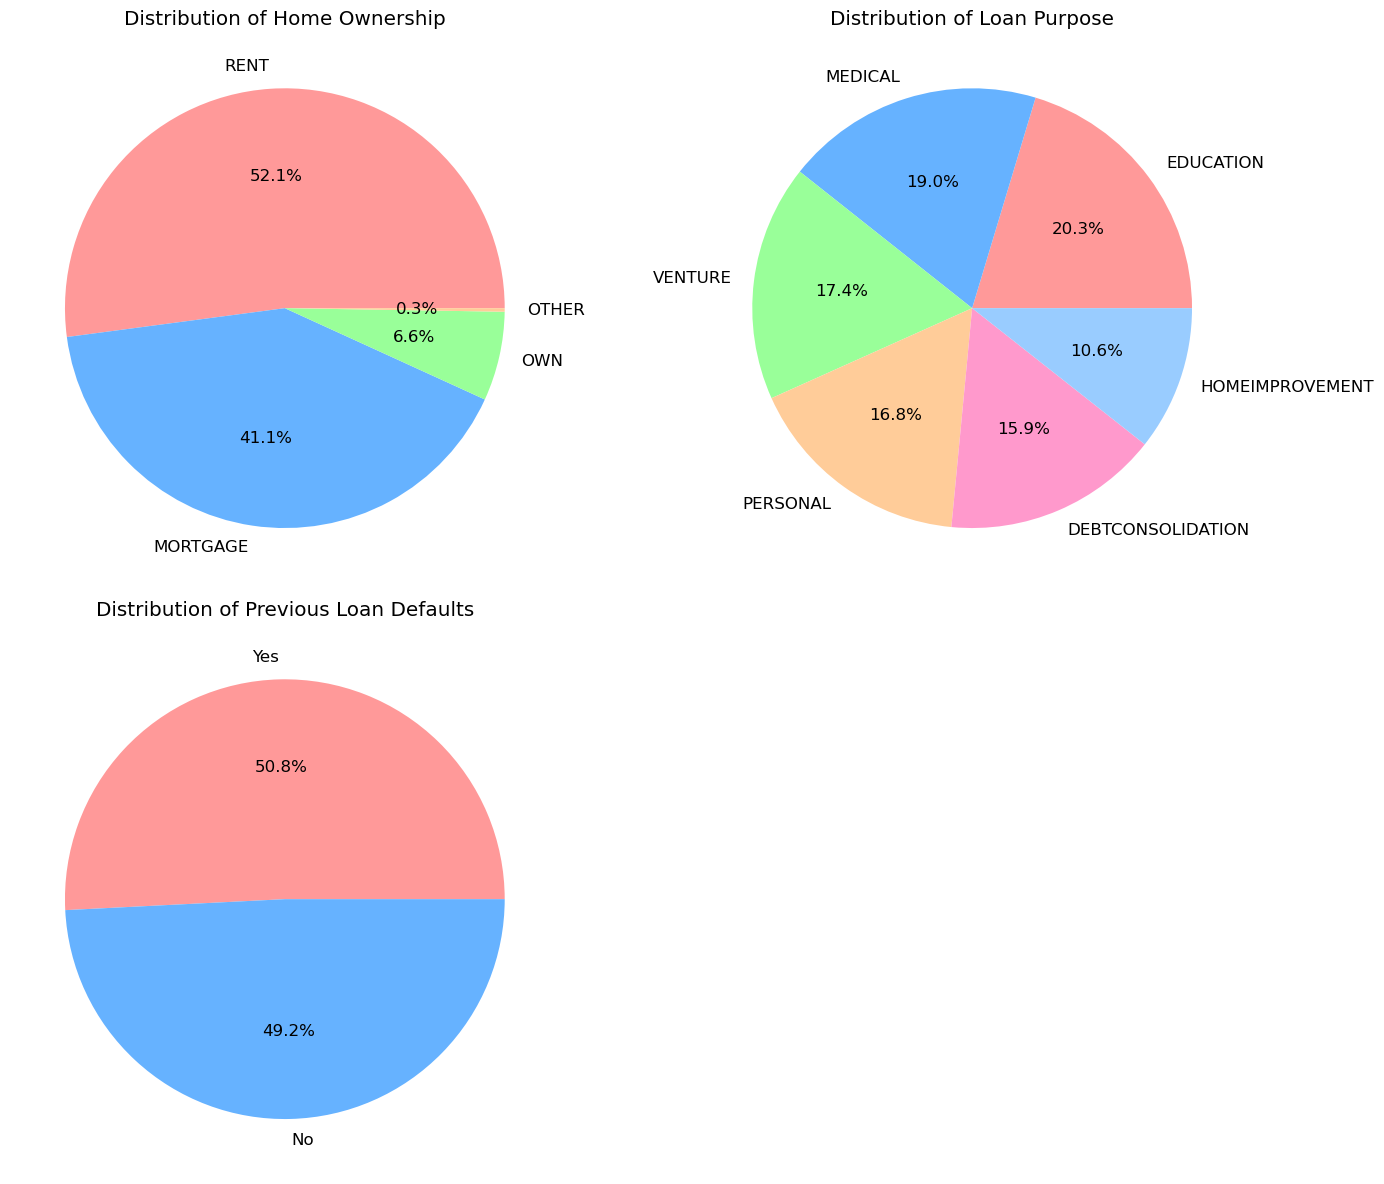

In [39]:
import matplotlib.pyplot as plt

# 設置圖表風格
plt.style.use('default')
plt.rcParams['font.size'] = 12

# 申請人基本特徵 (2x1布局)
plt.figure(figsize=(15, 6))

# 性別分布
plt.subplot(121)
gender_data = df['person_gender'].value_counts()
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Applicant Gender')

# 教育程度分布
plt.subplot(122)
education_data = df['person_education'].value_counts()
plt.pie(education_data, labels=education_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title('Distribution of Education Level')
plt.tight_layout()
plt.show()

# 貸款相關特徵 (2x2布局)
plt.figure(figsize=(15, 12))

# 住房所有權狀態
plt.subplot(221)
home_data = df['person_home_ownership'].value_counts()
plt.pie(home_data, labels=home_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Distribution of Home Ownership')

# 貸款目的
plt.subplot(222)
purpose_data = df['loan_intent'].value_counts()
plt.pie(purpose_data, labels=purpose_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF'])
plt.title('Distribution of Loan Purpose')

# 過往貸款違約記錄
plt.subplot(223)
default_data = df['previous_loan_defaults_on_file'].value_counts()
plt.pie(default_data, labels=default_data.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Previous Loan Defaults')

plt.tight_layout()
plt.show()


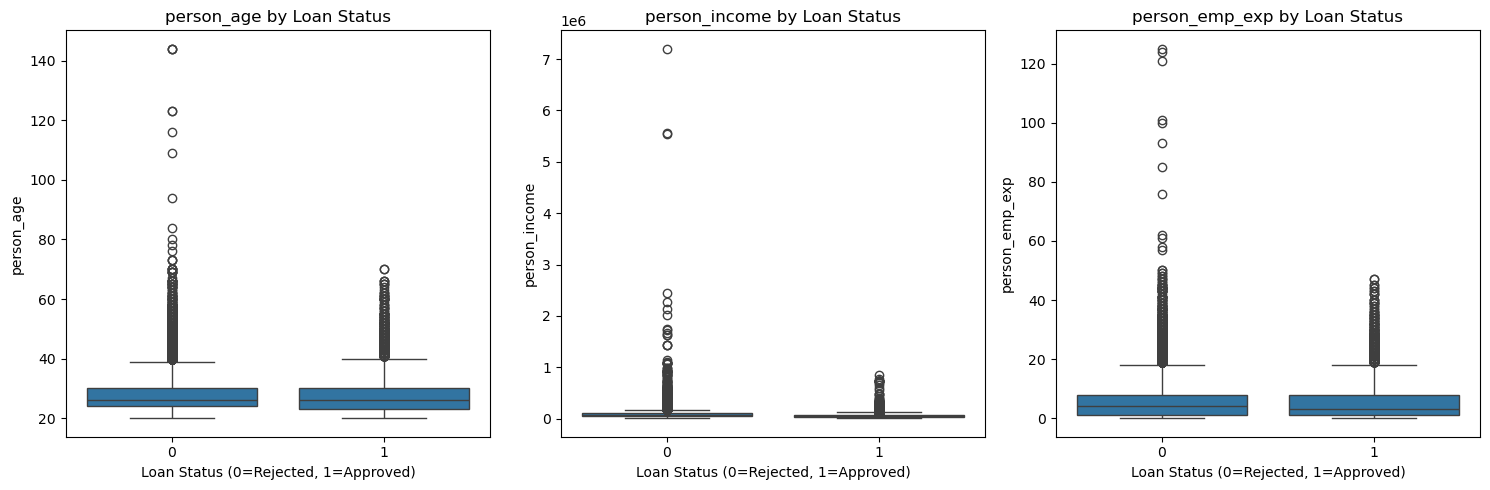

C:\Users\user\AppData\Local\Temp\ipykernel_1548\4053720987.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2[idx].set_xticklabels(axes2[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_1548\4053720987.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2[idx].set_xticklabels(axes2[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_1548\4053720987.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2[idx].set_xticklabels(axes2[idx].get_xticklabels(), rotation=45)


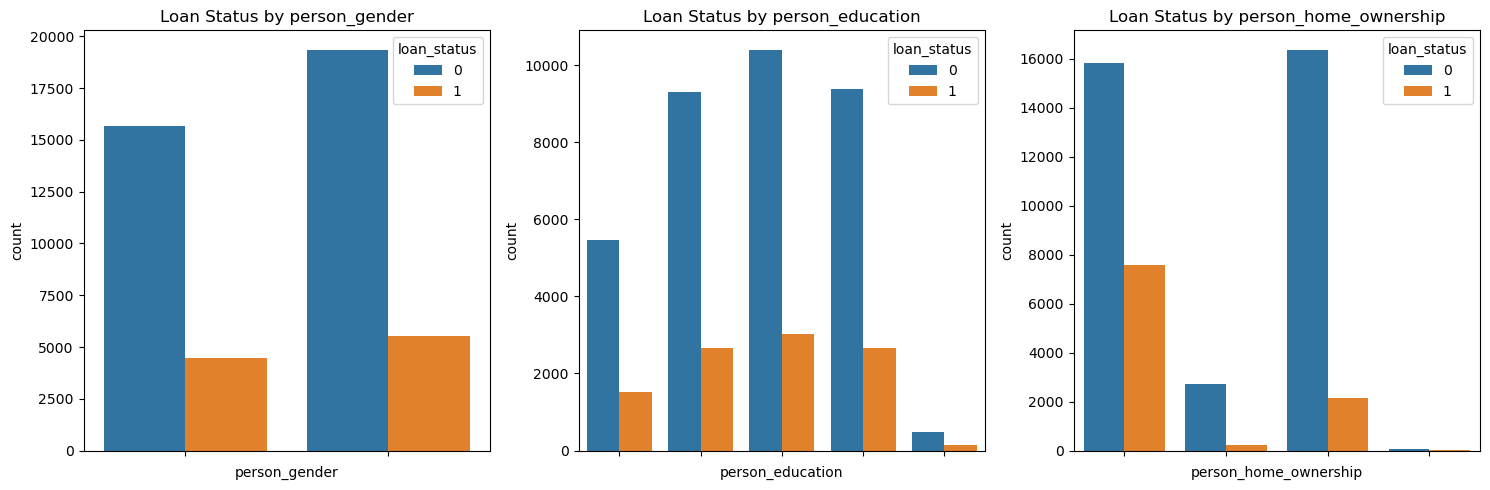

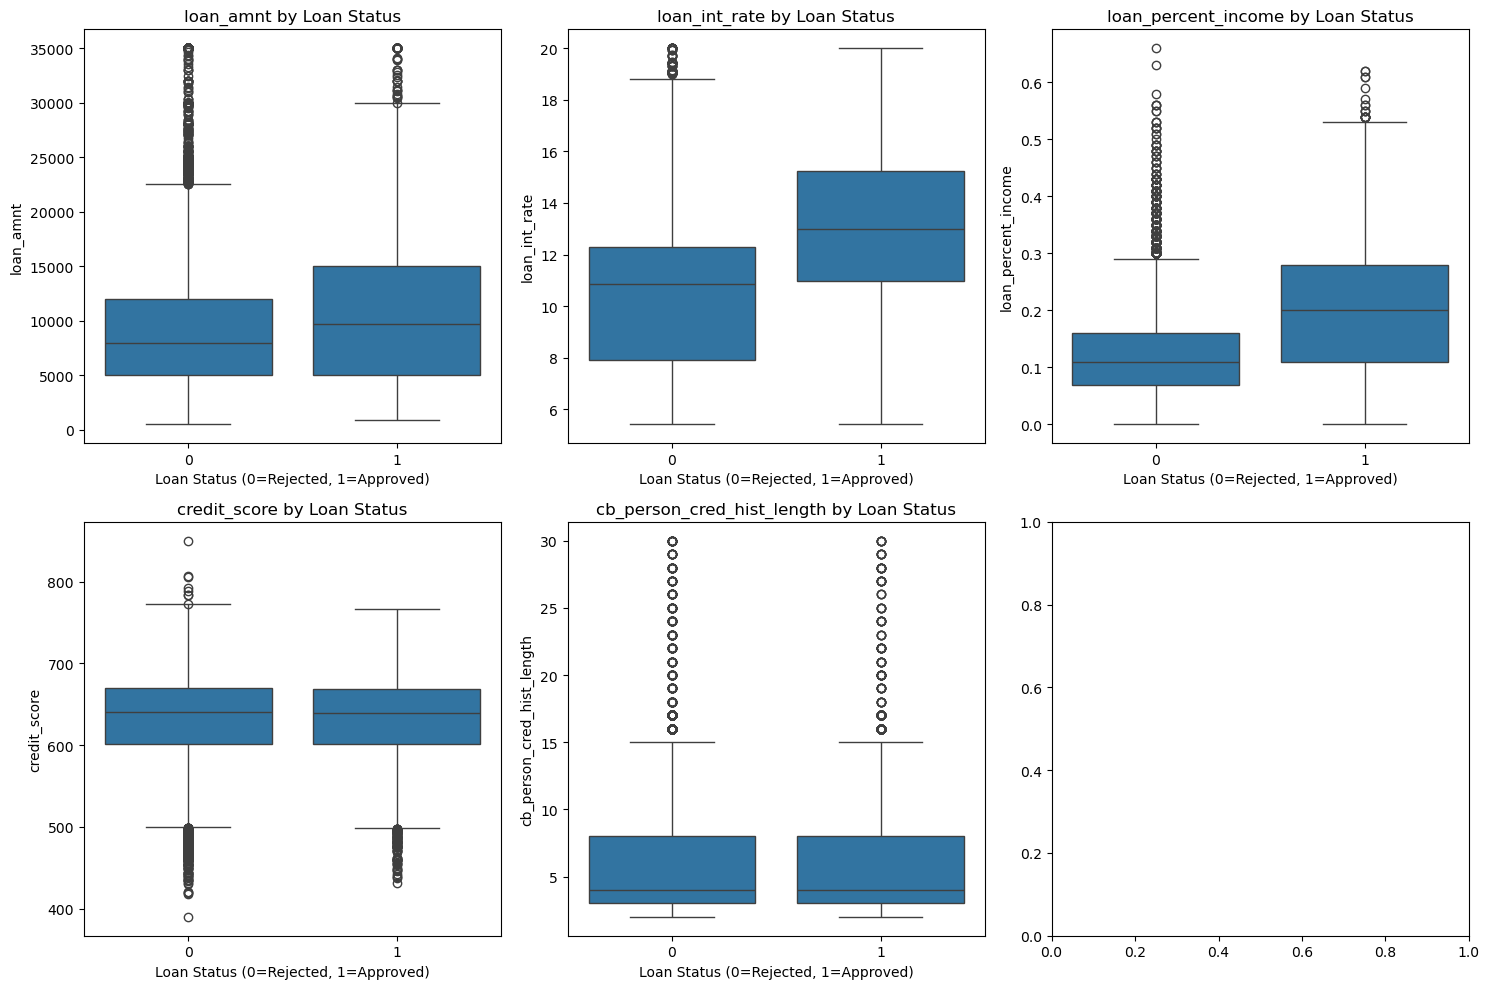

C:\Users\user\AppData\Local\Temp\ipykernel_1548\4053720987.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)
C:\Users\user\AppData\Local\Temp\ipykernel_1548\4053720987.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)


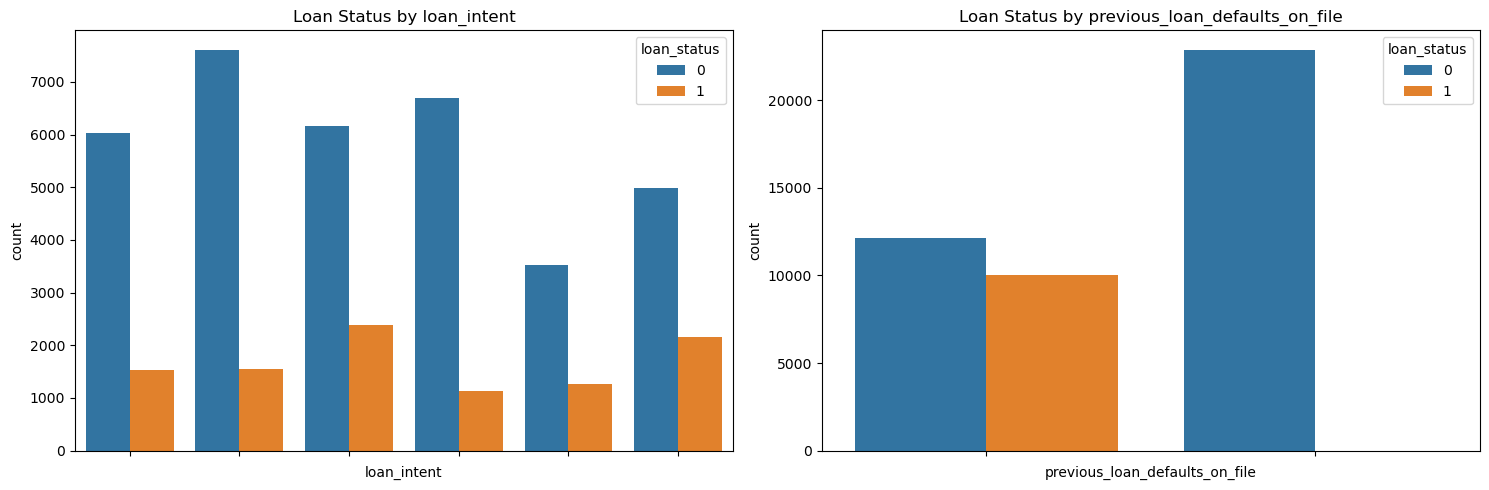

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定義特徵分類
personal_numerical = ['person_age', 'person_income', 'person_emp_exp']
personal_categorical = ['person_gender', 'person_education', 'person_home_ownership']
loan_numerical = ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                 'credit_score', 'cb_person_cred_hist_length']
loan_categorical = ['loan_intent', 'previous_loan_defaults_on_file']

# 申請人基本資訊 - 數值特徵
fig1, axes1 = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(personal_numerical):
    sns.boxplot(data=df, x='loan_status', y=feature, ax=axes1[idx])
    axes1[idx].set_title(f'{feature} by Loan Status')
    axes1[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')
    axes1[idx].grid(False)
plt.tight_layout()
plt.show()

# 申請人基本資訊 - 類別特徵
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(personal_categorical):
    sns.countplot(data=df, x=feature, hue='loan_status', ax=axes2[idx])
    axes2[idx].set_title(f'Loan Status by {feature}')
    axes2[idx].set_xticklabels(axes2[idx].get_xticklabels(), rotation=45)
    axes2[idx].grid(False)
plt.tight_layout()
plt.show()

# 貸款相關資訊 - 數值特徵
fig3, axes3 = plt.subplots(2, 3, figsize=(15, 10))
axes3 = axes3.ravel()
for idx, feature in enumerate(loan_numerical):
    sns.boxplot(data=df, x='loan_status', y=feature, ax=axes3[idx])
    axes3[idx].set_title(f'{feature} by Loan Status')
    axes3[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')
    axes3[idx].grid(False)
plt.tight_layout()
plt.show()

# 貸款相關資訊 - 類別特徵
fig4, axes4 = plt.subplots(1, 2, figsize=(15, 5))
for idx, feature in enumerate(loan_categorical):
    sns.countplot(data=df, x=feature, hue='loan_status', ax=axes4[idx])
    axes4[idx].set_title(f'Loan Status by {feature}')
    axes4[idx].set_xticklabels(axes4[idx].get_xticklabels(), rotation=45)
    axes4[idx].grid(False)
plt.tight_layout()
plt.show()


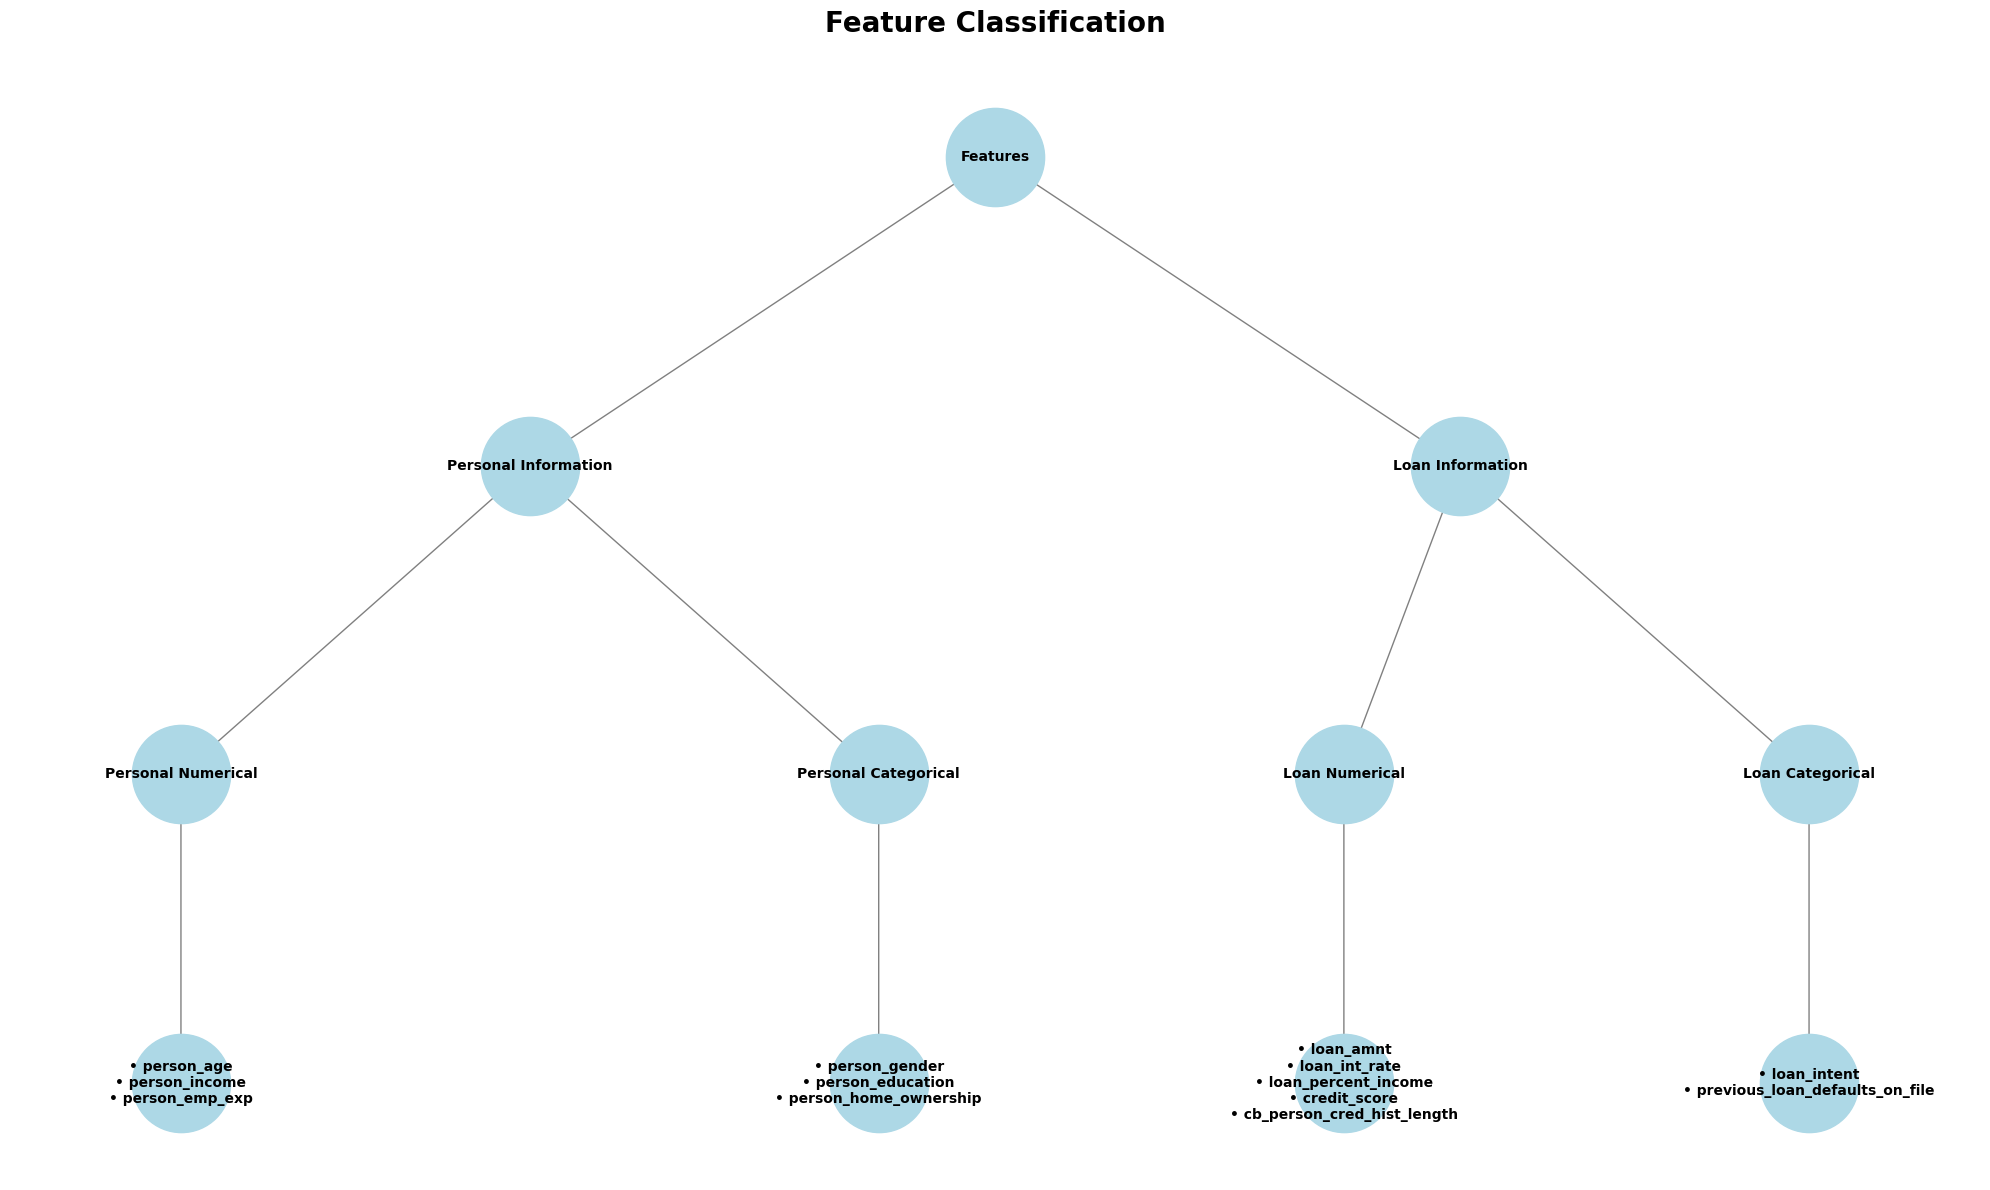

In [47]:
import matplotlib.pyplot as plt
import networkx as nx

# 創建有向圖
G = nx.DiGraph()

# 添加節點
G.add_node("Features", pos=(0.5, 4))

# 添加主要分類
G.add_node("Personal Information", pos=(0.3, 3))
G.add_node("Loan Information", pos=(0.7, 3))

# 添加子分類
G.add_node("Personal Numerical", pos=(0.15, 2))
G.add_node("Personal Categorical", pos=(0.45, 2))
G.add_node("Loan Numerical", pos=(0.65, 2))
G.add_node("Loan Categorical", pos=(0.85, 2))

# 添加特徵
personal_num = "• person_age\n• person_income\n• person_emp_exp"
personal_cat = "• person_gender\n• person_education\n• person_home_ownership"
loan_num = "• loan_amnt\n• loan_int_rate\n• loan_percent_income\n• credit_score\n• cb_person_cred_hist_length"
loan_cat = "• loan_intent\n• previous_loan_defaults_on_file"

G.add_node(personal_num, pos=(0.15, 1))
G.add_node(personal_cat, pos=(0.45, 1))
G.add_node(loan_num, pos=(0.65, 1))
G.add_node(loan_cat, pos=(0.85, 1))

# 添加邊
edges = [
    ("Features", "Personal Information"),
    ("Features", "Loan Information"),
    ("Personal Information", "Personal Numerical"),
    ("Personal Information", "Personal Categorical"),
    ("Loan Information", "Loan Numerical"),
    ("Loan Information", "Loan Categorical"),
    ("Personal Numerical", personal_num),
    ("Personal Categorical", personal_cat),
    ("Loan Numerical", loan_num),
    ("Loan Categorical", loan_cat)
]
G.add_edges_from(edges)

# 繪製圖形
plt.figure(figsize=(20, 12))
pos = nx.get_node_attributes(G, 'pos')

# 繪製邊
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=30)

# 繪製節點
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000)

# 繪製標籤
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# 添加標題
plt.title("Feature Classification", pad=20, size=20, fontweight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()


In [48]:
# 簡化版本
data = {
    '特徵分類': ['數值特徵', '類別特徵'] * 2,
    '資訊類別': ['申請人基本資訊'] * 2 + ['貸款相關資訊'] * 2,
    '特徵列表': [
        'person_age, person_income, person_emp_exp',
        'person_gender, person_education, person_home_ownership',
        'loan_amnt, loan_int_rate, loan_percent_income, credit_score, cb_person_cred_hist_length',
        'loan_intent, previous_loan_defaults_on_file'
    ]
}

df_simple = pd.DataFrame(data)
display(df_simple)


,特徵分類,資訊類別,特徵列表
0,數值特徵,申請人基本資訊,"person_age, person_income, person_emp_exp"
1,類別特徵,申請人基本資訊,"person_gender, person_education, person_home_o..."
2,數值特徵,貸款相關資訊,"loan_amnt, loan_int_rate, loan_percent_income,..."
3,類別特徵,貸款相關資訊,"loan_intent, previous_loan_defaults_on_file"


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 定義特徵分類
features_dict = {
    '申請人基本資訊': {
        '數值特徵': ['person_age', 'person_income', 'person_emp_exp'],
        '類別特徵': ['person_gender', 'person_education', 'person_home_ownership']
    },
    '貸款相關資訊': {
        '數值特徵': ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                    'credit_score', 'cb_person_cred_hist_length'],
        '類別特徵': ['loan_intent', 'previous_loan_defaults_on_file']
    }
}

# 創建表格數據
rows = []
for category, features in features_dict.items():
    rows.append({
        '資訊分類': category,
        '特徵類型': '數值特徵',
        '特徵名稱': '\n'.join(features['數值特徵'])
    })
    rows.append({
        '資訊分類': category,
        '特徵類型': '類別特徵',
        '特徵名稱': '\n'.join(features['類別特徵'])
    })

# 創建DataFrame
df = pd.DataFrame(rows)

# 設置表格樣式
def style_df(df):
    return df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])

# 顯示表格
styled_df = style_df(df)
display(styled_df)


,資訊分類,特徵類型,特徵名稱
0,申請人基本資訊,數值特徵,person_age person_income person_emp_exp
1,申請人基本資訊,類別特徵,person_gender person_education person_home_ownership
2,貸款相關資訊,數值特徵,loan_amnt loan_int_rate loan_percent_income credit_score cb_person_cred_hist_length
3,貸款相關資訊,類別特徵,loan_intent previous_loan_defaults_on_file


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U4')) -> None

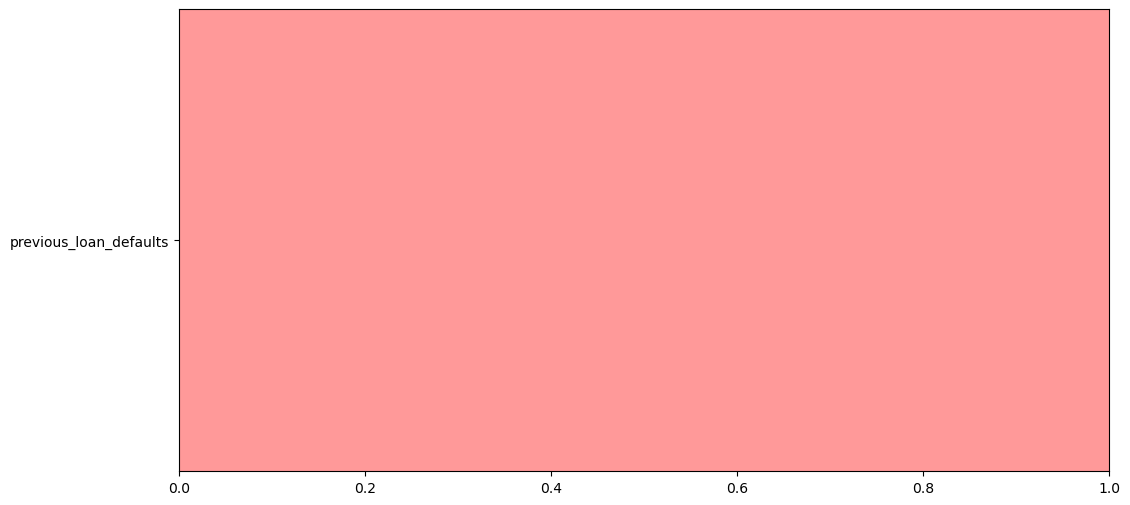

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# 創建數據
features = {
    '特徵': ['previous_loan_defaults', 'loan_percent_income', 'loan_int_rate', 
            'person_home_ownership_RENT', 'person_home_ownership_MORTGAGE',
            'person_income', 'loan_amnt', 'others'],
    'F值': [18824.73, 7824.79, 5574.45, 3135.77, 2148.03, 845.53, 528.21, '<500']
}

df = pd.DataFrame(features)

# 創建水平條形圖
plt.figure(figsize=(12, 6))
plt.barh(df['特徵'], df['F值'], color=['#FF9999', '#66B2FF', '#99FF99', 
                                    '#FFCC99', '#FF99CC', '#99CCFF', 
                                    '#FFB366', '#C2C2F0'])
plt.title('Feature Importance (F-value)')
plt.xlabel('F-value')
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_1548\3741597569.py:23: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from cur

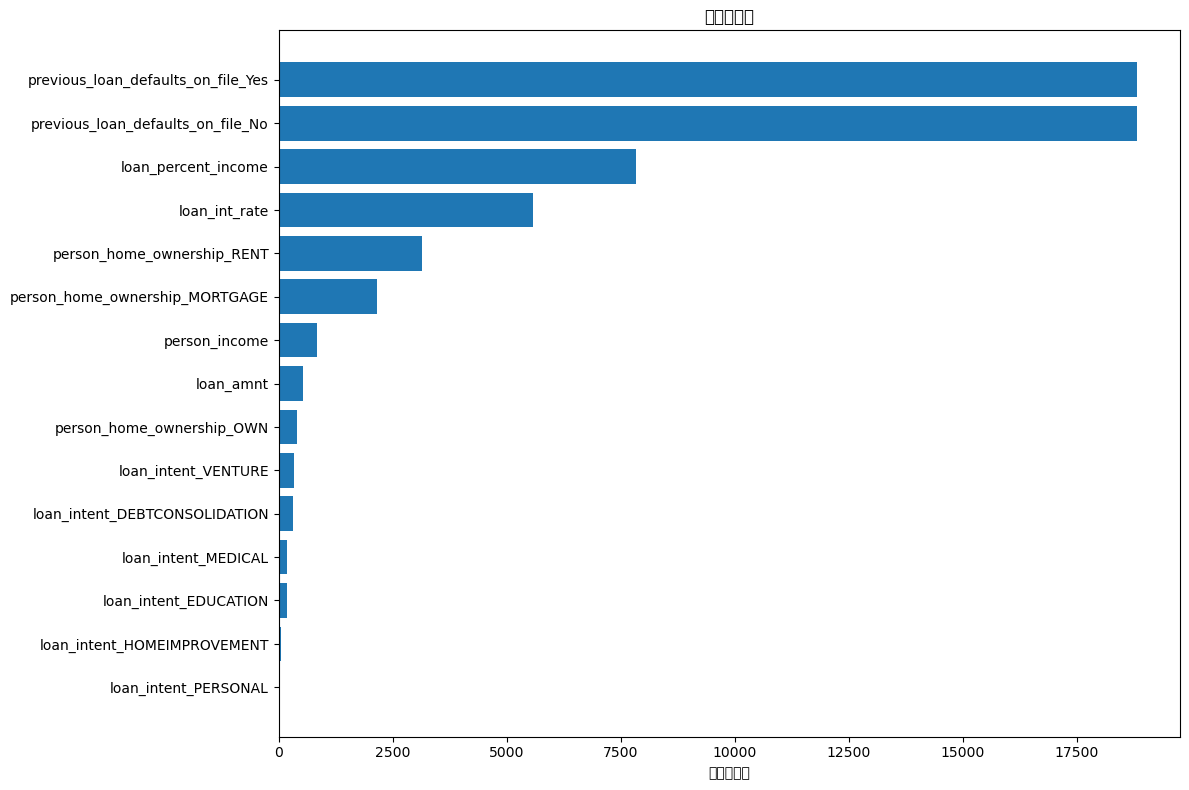

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# 創建數據框
data = {
    'Feature': ['previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes', 
                'loan_percent_income', 'loan_int_rate', 'person_home_ownership_RENT', 
                'person_home_ownership_MORTGAGE', 'person_income', 'loan_amnt', 
                'person_home_ownership_OWN', 'loan_intent_DEBTCONSOLIDATION', 
                'loan_intent_VENTURE', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 
                'loan_intent_HOMEIMPROVEMENT', 'loan_intent_PERSONAL'],
    'Importance': [18824.73, 18824.73, 7824.79, 5574.45, 3135.77, 2148.03, 845.53, 
                   528.21, 398.28, 320.76, 335.22, 185.10, 192.08, 51.58, 22.77]
}

df = pd.DataFrame(data)
df = df.sort_values('Importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(df['Feature'], df['Importance'])
plt.title('特徵重要性')
plt.xlabel('重要性分數')
plt.tight_layout()
plt.show()

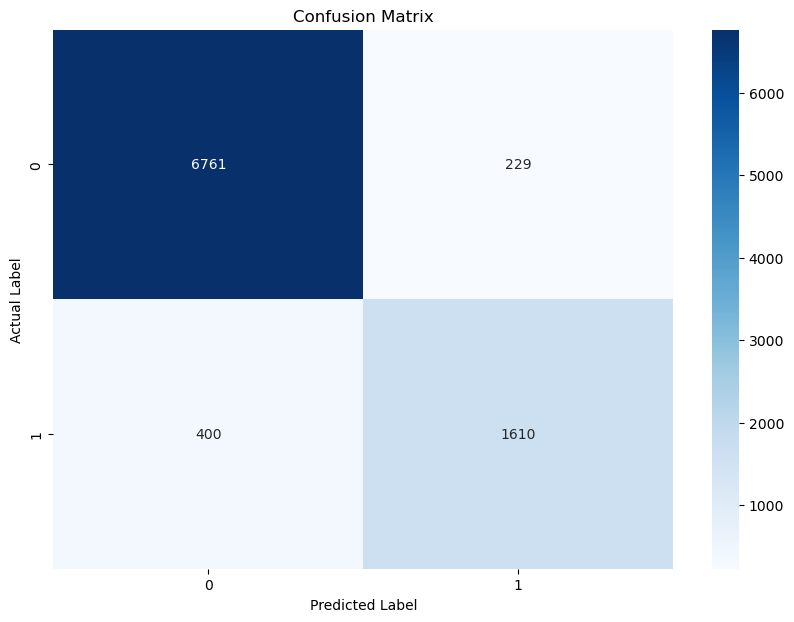

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

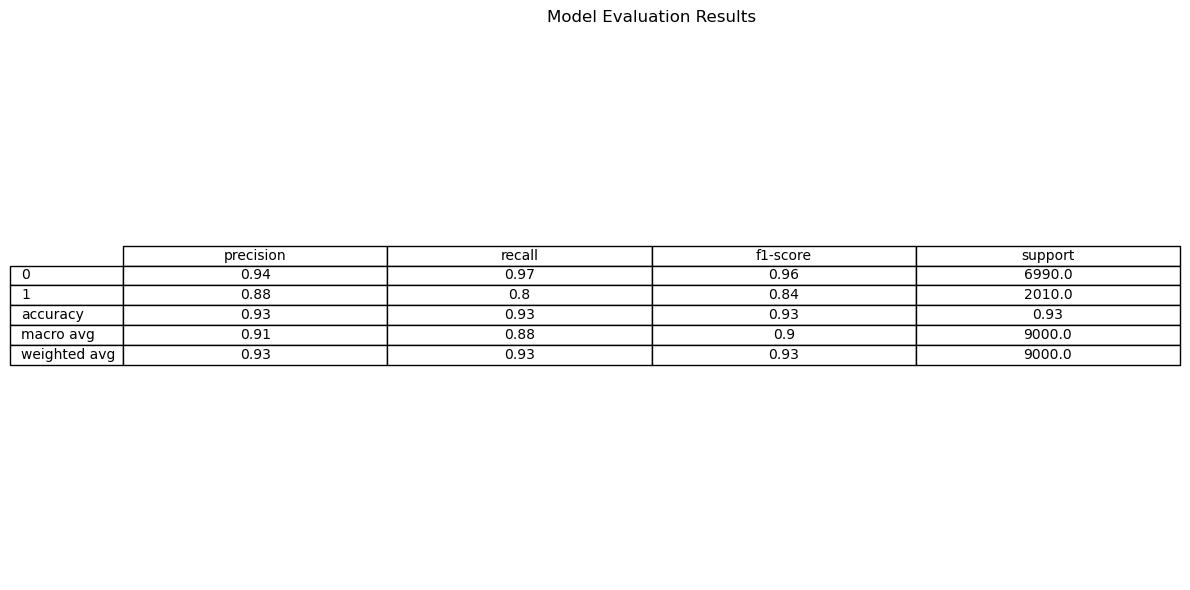

In [55]:
import pandas as pd

results = classification_report(y_test, y_pred, output_dict=True)
df_results = pd.DataFrame(results).transpose()
df_results = df_results.round(2)  # Round to two decimal places

plt.figure(figsize=(12,6))
plt.axis('off')
plt.table(cellText=df_results.values,
          rowLabels=df_results.index,
          colLabels=df_results.columns,
          cellLoc = 'center',
          loc='center')
plt.title('Model Evaluation Results')
plt.tight_layout()
plt.show()